## 0. Installation

Pour charger tous les modules utiles, il suffit d'exécuter la commande suivante à la racine du répertoire :

```sh
pip install -r requirements.txt
```

La première calibration d'un modèle nécessite un surplus de RAM pouvant aller jusqu'à +9 Go. Si votre ordinateur ne dispose pas d'une RAM suffisante, alors il risque de crasher. Pour y remédier, vous pouvez augmenter l'espace SWAP pour étendre virtuellement la RAM (il existe des tutos en ligne).

Une connexion internet est également nécessaire pour le téléchargement des données.

## 1. Structure du répertoire

Du point de vue utilisateur, toutes les fonctions, variables et classes utiles sont accessibles depuis le fichier `main.py` situé à la racine.

La structure du répertoire comprend un certain nombre de dossiers, dont certains sont créés automatiquement lors de la première exécution du programme.

```
MatMat-Trade
│   main.py
│   main.ipynb
|   ...
│
└───src
│   │   figures.py
│   │   model.py
│   │   scenarios.py
│   │   settings.py
│   │   stressors.py
│   │   utils.py
|   |   ...
│   
└───data
│   └───aggregation
│   |   │   ...
|   |
│   └───capital_consumption
│   |   │   ...
|   |
│   └───exiobase
│       └───2015__pxp
|   |   |   |   ...
|   |
│   └───models
│       └───2015__pxp__opti_S__GES
|   |   |   |   ...
| 
└───doc
|   │   ...
|
└───figures
│   └───2015__pxp__opti_S__GES
|   |   |   ...
|   |
|   └───multimodel
|   |   |   ...
|   |
|   |   ...

```

- le fichier `main.py` regroupe les fonctions, variables et classes prêtes à être utilisées
- le fichier `main.ipynb` est un notebook de prise en main rapide du répertoire
- le dossier `src` regroupe les fichiers de code
    - le fichier `figures.py` regroupe les fonctions qui éditent les différents graphiques, et leurs fonctions auxiliaires
    - le fichier `model.py` définit les objets `Model` et `Counterfactual` qui font le lien avec tous les autres fichiers
    - le fichier `scenarios.py` définit les différents scénarios de commerce international
    - le fichier `settings.py` regroupe les différents paramètres d'exécution (chemins d'accès, palette graphique...)
    - le fichier `stressors.py` regroupe des exemples de dictionnaires de paramètres pour la prise en compte de différents stressors (GES, matières, usage des sols)
    - le fichier `utils.py` est vue comme une boîte à outils qui regroupe diverses fonctions transversales
- le dossier `data` stocke différentes structures de données téléchargées ou générées par le programme
    - le sous-dossier `aggregation` regroupe différentes matrices d'agrégation (par région et par secteur), utilisées pour augmenter ou réduire la granularité des modèles
    - le sous-dossier `capital_consumption` regroupe des données brutes de consommation de capital (si nécessaire, les données sont téléchargées puis stockées en vue d'un usage ultérieur)
    - le sous-dossier `exiobase` regroupe les données brutes des bases Exiobase 3 téléchargées, caractérisées par leur année (ex : 2015) et leur système (ex : pxp)
    - le sous-dossier `models` regroupe les sauvegardes des différents modèles générés, caractérisés par leur année (ex : 2015), leur système (ex : pxp), leur matrice d'agrégation (ex : opti_S), leur stressor (ex : GES) et éventuellement par l'endogénéisation du capital si c'est le cas.
- le dossier `doc` regroupe des documents utiles
- le dossier `figures` regroupe les figures générées
    - le sous-dossier `multimodel` regroupe les figures comparant plusieurs modèles (ex : évolution temporelle)
    - les autres sous-dossiers correspondent chacun à un modèle précis, et regroupent les figures associées par contrefactuel et par grandeur représentée

## 2. La classe `Model`

L'outil central de ce code est la classe `Model`. La première création d'une instance peut prendre du temps pour télécharger la base et pour la calibrer. Lorsque la base a été téléchargée, alors elle est enregistrée. De même, lorsqu'une calibration est effectuée, l'objet obtenu est également enregistré.

La première fois, cette étape peut durer une dizaine de minutes, et nécessite de la RAM et une connexion internet. Les fois suivantes, cette étape dure moins de 5 secondes.

La classe `Model` présente plusieurs arguments :
- `base_year` : année de base du modèle.
- `system` : système à utiliser (au sens d'Exiobase, donc "pxp" ou "ixi").
- `aggregation_name` : nom d'un fichier du dossier `data/aggregation` (sans l'extension, par exemple "opti_S" pour `opti_S.xlsx`), permettant de gérer la granularité géographique et sectorielle du modèle.
- `calib` : pour forcer la recalibration du modèle (par exemple si on choisit d'utiliser Exiobase 2 plutôt qu'Exiobase 3 dans un modèle ayant déjà été calibré précédemment).
- `regions_mapper` : agrégateur de régions pour l'affichage (cette agrégation n'a aucune incidence sur le modèle et les résultats, elle permet seulement d'améliorer la lisibilité des graphiques en agrégeant les résultats), ce paramètre peut être modifié ultérieurement sans avoir à créer un nouveau modèle. Un exemple est donné dans `src/settings.py`.
- `sectors_mapper` : même principe que `regions_mapper` mais avec les secteurs.
- `capital` : permet d'endogénéiser le capital dans le modèle.
- `stressor_params` : dictionnaire de paramètres d'un stressor au choix (GES, matières, usage des sols...), plusieurs exemples dans `src/stressors.py`.

Tous ces arguments ont une valeur par défaut, il n'est donc pas nécessaire de tous les saisir systématiquement : il suffit de saisir ceux dont on souhaite changer la valeur par défaut. Par défaut, le modèle généré se rapporte à l'année 2015 avec un système "pxp", il utilise l'agrégation du fichier `opti_S.xslx`, les mappers du fichier `src/settings.py`, il n'endogénéise pas le capital et il se focalise sur les émissions de GES.

In [16]:
from main import Model
import pandas as pd

model = Model(aggregation_name="IMACLIM_format")


Loading data... (may take a few minutes)
Data loaded successfully !


Les objets `Model` disposent de plusieurs méthodes et attributs utiles documentés dans le fichier `model.py`. Voici ci-dessous quelques exemples.

In [3]:
print("Liste des régions : ", model.regions)
print("Année : ", model.base_year)
print("Caractérisation détaillée du modèle : ", model.summary_long)

Liste des régions :  ['AFR', 'BR', 'CA', 'CN', 'CIS', 'EUR', 'IN', 'JAN', 'MDE', 'RAL', 'RAS', 'US', 'World']
Année :  2015
Caractérisation détaillée du modèle :  2015__pxp__IMACLIM_format__ghg


Parmi ces attributs, le plus important est `iot` qui est en fait le modèle MRIO fourni par `pymrio` : il s'agit d'un objet `pymrio.IOSystem`. Il dispose d'un compte satellite `stressor_extension` qui contient les informations relatives aux stressors, structuré selon la nomenclature standard de la librairie `pymrio`.

In [3]:
print("Type de l'attribut `iot` : ", type(model.iot))

Type de l'attribut `iot` :  <class 'pymrio.core.mriosystem.IOSystem'>


In [8]:
print("La matrice de transaction")
model.iot.L

La matrice de transaction


region                               AFR                                   \
sector                       Agriculture       Air      Coal Construction   
region sector                                                               
AFR    Agriculture              1.323969  0.079079  0.076625     0.065989   
       Air                      0.001129  1.036397  0.004708     0.002971   
       Coal                     0.000545  0.000978  1.014220     0.003218   
       Construction             0.002268  0.011851  0.013083     1.114733   
       Elec                     0.002973  0.005891  0.007736     0.007437   
...                                  ...       ...       ...          ...   
World  Liquid fuels             0.000000  0.000000  0.000000     0.000000   
       Maritime                 0.000000  0.000000  0.000000     0.000000   
       Oil                      0.000000  0.000000  0.000000     0.000000   
       Services                 0.000000  0.000000  0.000000     0.000000   
       Terrestrial transport    0.000000  0.000000  0.000000     0.000000   

region                                                                   \
sector                            Elec       Gas  Industry Liquid fuels   
region sector                                                             
AFR    Agriculture            0.098706  0.056591  0.175071     0.023372   
       Air                    0.003016  0.004984  0.003108     0.001767   
       Coal                   0.009437  0.006192  0.004614     0.001869   
       Construction           0.016628  0.009491  0.010708     0.005523   
       Elec                   1.007995  0.022523  0.011773     0.012982   
...                                ...       ...       ...          ...   
World  Liquid fuels           0.000000  0.000000  0.000000     0.000000   
       Maritime               0.000000  0.000000  0.000000     0.000000   
       Oil                    0.000000  0.000000  0.000000     0.000000   
       Services               0.000000  0.000000  0.000000     0.000000   
       Terrestrial transport  0.000000  0.000000  0.000000     0.000000   

region                                            ... World                    \
sector                        Maritime       Oil  ...  Coal Construction Elec   
region sector                                     ...                           
AFR    Agriculture            0.069042  0.009570  ...   0.0          0.0  0.0   
       Air                    0.005300  0.000168  ...   0.0          0.0  0.0   
       Coal                   0.000788  0.001919  ...   0.0          0.0  0.0   
       Construction           0.012165  0.001305  ...   0.0          0.0  0.0   
       Elec                   0.004120  0.003837  ...   0.0          0.0  0.0   
...                                ...       ...  ...   ...          ...  ...   
World  Liquid fuels           0.000000  0.000000  ...   0.0          0.0  0.0   
       Maritime               0.000000  0.000000  ...   0.0          0.0  0.0   
       Oil                    0.000000  0.000000  ...   0.0          0.0  0.0   
       Services               0.000000  0.000000  ...   0.0          0.0  0.0   
       Terrestrial transport  0.000000  0.000000  ...   0.0          0.0  0.0   

region                                                                 \
sector                        Gas Industry Liquid fuels Maritime  Oil   
region sector                                                           
AFR    Agriculture            0.0      0.0          0.0      0.0  0.0   
       Air                    0.0      0.0          0.0      0.0  0.0   
       Coal                   0.0      0.0          0.0      0.0  0.0   
       Construction           0.0      0.0          0.0      0.0  0.0   
       Elec                   0.0      0.0          0.0      0.0  0.0   
...                           ...      ...          ...      ...  ...   
World  Liquid fuels           0.0      0.0          1.0      0.0  0.0   
     

In [5]:
print("Les coefficients de facteurs de production")
model.iot.stressor_extension.S["FR"]

Les coefficients de facteurs de production


sector,Agriculture,Crude coal,Crude oil,Natural gas,Extractive industry,Biomass_industry,Clothing,Heavy_industry,Construction,Automobile,Oth transport equipment,Machinery,Electronics,Fossil fuels,Electricity and heat,Transport services,Composite
CO2,137627.985499,1.605084e+06,1.677307e+05,299625.588830,98681.555376,48483.338577,19409.880228,169323.779948,7443.811764,9140.403209,8557.222150,22670.906771,35069.742587,308155.384129,297524.327294,439583.426874,19519.638457
CH4,582515.677420,3.433804e+02,2.098384e+06,27435.322523,253.345114,1596.604113,279.581220,880.025940,39.022795,73.668022,106.751059,95.892018,159.122503,2787.964129,1255.958734,232.056849,7381.810966
N2O,359802.866468,1.036141e+04,2.594910e+03,147.196628,622.501000,2129.545198,20.958070,630.613779,19.334466,53.076887,48.633479,204.695011,316.561099,554.142912,1094.817272,5667.412530,155.633028
SF6,968.828489,3.003983e+02,1.156648e+02,12.252907,12102.368467,173.249792,15.883472,137.396221,0.000000,0.000000,0.000000,16.444391,24.040241,579.707761,0.000000,0.000000,62.844097
HFC,51724.593932,1.608868e+04,7.006032e+03,628.857010,631623.238054,9109.496452,839.141363,13356.898942,0.000000,0.000000,0.000000,847.402859,1241.130443,30555.556918,0.000000,0.000000,2241.590147
PFC,299.593264,1.030158e+02,5.958495e+01,4.980849,3630.515725,53.741718,4.575009,558.727484,0.000000,0.000000,0.000000,4.613821,7.494929,163.288851,0.000000,0.000000,17.991192


In [6]:
print("Empreinte de la consommation")
model.iot.stressor_extension.D_cba

Empreinte de la consommation


region                FR                                             \
sector       Agriculture    Crude coal      Crude oil   Natural gas   
region                                                                
FR     CO2  4.792903e+09  1.382060e+07   31455.642931  2.894587e+09   
       CH4  1.581058e+10  3.731577e+04  356748.478113  2.752792e+08   
       N2O  9.711913e+09  9.285682e+04     559.426818  7.759784e+06   
       SF6  2.799531e+07  2.817789e+03      26.087670  4.765640e+05   
       HFC  1.486500e+09  1.473539e+05    1475.474376  2.465477e+07   
...                  ...           ...            ...           ...   
EU     CH4  2.953502e+09  2.766425e+05   23801.348483  4.132613e+07   
       N2O  1.855628e+09  8.826476e+03     371.348249  4.271598e+06   
       SF6  8.770121e+07  4.242423e+04     230.446482  4.955880e+06   
       HFC  2.135023e+08  3.601760e+04     616.583550  9.077954e+06   
       PFC  5.260237e+07  2.955688e+03     138.241961  4.084395e+06   

region                                                                        \
sector     Extractive industry Biomass_industry      Clothing Heavy_industry   
region                                                                         
FR     CO2        5.814575e+06     9.846822e+09  3.914785e+08   1.325707e+10   
       CH4        3.610041e+05     9.890740e+09  7.349500e+07   6.289822e+08   
       N2O        1.261127e+05     5.990543e+09  2.652668e+07   1.941616e+08   
       SF6        4.797214e+05     3.627270e+07  5.526131e+05   2.463522e+07   
       HFC        2.502682e+07     1.890336e+09  2.781336e+07   1.640656e+09   
...                        ...              ...           ...            ...   
EU     CH4        3.301055e+05     3.212910e+09  2.620073e+08   5.428854e+08   
       N2O        9.234974e+04     1.849941e+09  6.670247e+07   1.073958e+08   
       SF6        6.265886e+05     1.804793e+08  2.703760e+07   1.675524e+08   
       HFC        2.211837e+06     4.603654e+08  6.048462e+07   2.961444e+08   
       PFC        8.380512e+05     1.292375e+08  2.176458e+07   1.659284e+08   

region                                  ...             EU                \
sector      Construction    Automobile  ... Heavy_industry  Construction   
region                                  ...                                
FR     CO2  1.401922e+10  2.451749e+09  ...   2.126761e+09  1.707144e+09   
       CH4  2.531833e+09  3.152245e+08  ...   1.799277e+08  3.221998e+08   
       N2O  9.651647e+08  8.063465e+07  ...   7.501033e+07  1.545420e+08   
       SF6  5.413980e+07  3.620638e+06  ...   4.349944e+06  3.666689e+06   
       HFC  2.872949e+09  1.949645e+08  ...   2.733825e+08  2.091074e+08   
...                  ...           ...  ...            ...           ...   
EU     CH4  9.477799e+08  7.571215e+08  ...   7.662092e+09  2.155772e+10   
       N2O  2.620621e+08  1.369549e+08  ...   1.146511e+09  4.034982e+09   
       SF6  1.692397e+08  1.316155e+08  ...   3.201081e+09  3.704478e+09   
       HFC  3.388613e+08  2.378643e+08  ...   5.127199e+09  8.126646e+09   
       PFC  1.572839e+08  1.100238e+08  ...   3.212993e+09  3.454813e+09   

region                                                                        \
sector        Automobile Oth transport equipment     Machinery   Electronics   
region                                                                         
FR     CO2  1.433795e+09            5.538448e+08  1.885572e+09  4.246173e+08   
       CH4  1.808129e+08            7.764371e+07  1.926341e+08  4.705142e+07   
       N2O  5.250185e+07            1.837369e+07  6.414961e+07  1.676776e+07   
       SF6  2.214063e+06            7.768131e+05  3.106421e+06  5.849175e+05   
       HFC  1.222863e+08            3.864413e+07  1.720808e+08  3.089543e+07   
...                  ...                     ...           ...           ...   
EU     CH4  2.084770e+09            6.740912e+08  4.705635e+09  1.032100e+09   
       N2O  3.54578

## 3. Les scénarios

Plusieurs scénarios de commerce international sont codés dans le fichier `scenarios.py`. Pour étudier un scénario, il faut le faire tourner sur les données d'un objet `Model`. Pour cela, il suffit d'utiliser la méthode `new_counterfactual` en donnant un nom au scénario et en spécifiant sa fonction. La fonction d'un scénario de commerce international prend en argument un objet `Model` et retourne des matrices `Z` et `Y` modifiées.

À la fin du fichier `src/scenarios.py` se trouve un dictionnaire `DICT_SCENARIOS` qui référence ces arguments pour tous les scénarios disponibles ("best", "worst", "pref_eu" et "tradewar_china"). Il est recommandé d'utiliser ce dictionnaire pour utiliser la méthode `new_counterfactual`.

In [7]:
from main import DICT_SCENARIOS

model.new_counterfactual("best", DICT_SCENARIOS["best"])

Par défaut, les scénarios n'autorisent pas la relocalisation d'activités industrielles en France, mais il est possible de créer un nouveau contrefactuel avec l'argument `reloc` valant `True`, ce qui permet au scénario d'autoriser la relocalisation de certaines activités industrielles en France, dans la limite de ses capacités de production.

In [8]:
model.new_counterfactual("worst_reloc", DICT_SCENARIOS["worst"], reloc=True)

L'ajout de ces scénarios à l'objet `Model` peut se constater en consultant la liste des contrefactuels ayant été chargés.

Pour accéder aux données générées par ces scénarios, il suffit d'accéder à l'attribut `iot` des contrefactuels ajoutés à la liste de contrefactuels de l'objet `Model`. Cet attribut s'utilise de la même manière que l'attribut `iot` de l'objet `Model` : c'est également un objet `pymrio.IOSystem`.

In [9]:
print("Vecteur de production du scénario worst_reloc")
model.counterfactuals["best"].iot.x

Vecteur de production du scénario worst_reloc


indout
region sector                            
FR     Agriculture           8.337251e+04
       Crude coal            3.590556e+02
       Crude oil             1.675511e+03
       Natural gas           3.975449e+04
       Extractive industry   8.881822e+03
...                                   ...
EU     Electronics           2.532296e+05
       Fossil fuels          2.876800e+05
       Electricity and heat  4.177705e+05
       Transport services    8.787787e+05
       Composite             1.117514e+07

[187 rows x 1 columns]

Pour charger tous les scénarios disponibles, l'utilisateur peut utiliser la méthode `create_counterfactuals_from_dict` avec `DICT_SCNEARIOS` en argument. Cette méthode écrase les scénarios éventuellement déjà chargés portant le même nom que ceux de `DICT_SCNARIOS` (ici par exemple, le scénario `best`). Il est aussi possible de choisir l'option `reloc`.

In [10]:
model.create_counterfactuals_from_dict(DICT_SCENARIOS)

New counterfactual created : best
New counterfactual created : worst
New counterfactual created : pref_eu
New counterfactual created : tradewar_china
New counterfactual created : dummy


/home/mpotfer/miniconda3/envs/MatMat-Trade-env/lib/python3.8/site-packages/pandas/core/indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


New counterfactual created : emissivity_IMACLIM


/home/mpotfer/Stage/MatMat-Trade/src/model.py:147: PerformanceWarning: indexing past lexsort depth may impact performance.
  self.new_counterfactual(


New counterfactual created : technical_change_IMACLIM
Available counterfactuals : ['best', 'worst_reloc', 'worst', 'pref_eu', 'tradewar_china', 'dummy', 'emissivity_IMACLIM', 'technical_change_IMACLIM']


In [11]:


import tqdm
scenario_list=["INDC","INDC2020_1000","INDC2030_1000","INDC2020_1600","INDC2020_400","INDC2030_1600","baseline"]

for scenario in tqdm.tqdm(scenario_list):
    model.new_counterfactual("IMACLIM_all_2015_"+scenario, DICT_SCENARIOS["emissivity_IMACLIM"], year=2015,scenario=scenario)
    model.modify_counterfactual("IMACLIM_all_2015_"+scenario,DICT_SCENARIOS["technical_change_IMACLIM"], year=2015,scenario=scenario)
    
    model.new_counterfactual("IMACLIM_all_2050_"+scenario, DICT_SCENARIOS["emissivity_IMACLIM"], year=2050,scenario=scenario)
    model.modify_counterfactual("IMACLIM_all_2050_"+scenario,DICT_SCENARIOS["technical_change_IMACLIM"], year=2050,scenario=scenario)
    
    model.new_counterfactual("IMACLIM_emissivity_2015_"+scenario, DICT_SCENARIOS["emissivity_IMACLIM"], year=2015,scenario=scenario)
    model.new_counterfactual("IMACLIM_emissivity_2050_"+scenario, DICT_SCENARIOS["emissivity_IMACLIM"], year=2050,scenario=scenario)
    

  0%|          | 0/7 [00:00<?, ?it/s]/home/mpotfer/miniconda3/envs/MatMat-Trade-env/lib/python3.8/site-packages/pandas/core/indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/tmp/ipykernel_987/1795208189.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  model.modify_counterfactual("IMACLIM_all_2015_"+scenario,DICT_SCENARIOS["technical_change_IMACLIM"], year=2015,scenario=scenario)
/tmp/ipykernel_987/1795208189.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  model.modify_counterfactual("IMACLIM_all_2050_"+scenario,DICT_SCENARIOS["technical_change_IMACLIM"], year=2050,scenario=scenario)
100%|██████████| 7/7 [15:13<00:00, 130.54s/it]


In [14]:
from src.utils import footprint_extractor

all=pd.concat([ pd.DataFrame(footprint_extractor(model.counterfactuals["IMACLIM_all_"+str(year)+"_"+scenario],"FR"),index=[scenario+str(year)])["Importations"] for scenario in scenario_list for year in [2015,2050]],
          keys=[(scenario,year) for scenario in scenario_list for year in [2015,2050]]
          )
emissivity=pd.concat([ pd.DataFrame(footprint_extractor(model.counterfactuals["IMACLIM_emissivity_"+str(year)+"_"+scenario],"FR"),index=[scenario+str(year)])["Importations"] for scenario in scenario_list for year in [2015,2050]],
          keys=[(scenario,year) for scenario in scenario_list for year in [2015,2050]]
          )


In [15]:
pd.concat([emissivity,all],
          keys=["emissivity_change","emissivity_and_tech_change"])

emissivity_change           INDC           2015  INDC2015             3.323740e+11
                                           2050  INDC2050             2.175992e+11
                            INDC2020_1000  2015  INDC2020_10002015    3.323740e+11
                                           2050  INDC2020_10002050    1.656131e+11
                            INDC2030_1000  2015  INDC2030_10002015    3.323740e+11
                                           2050  INDC2030_10002050    1.696061e+11
                            INDC2020_1600  2015  INDC2020_16002015    3.323740e+11
                                           2050  INDC2020_16002050    1.755357e+11
                            INDC2020_400   2015  INDC2020_4002015     3.323740e+11
                                           2050  INDC2020_4002050     1.570552e+11
                            INDC2030_1600  2015  INDC2030_16002015    3.323740e+11
                                           2050  INDC2030_16002050    1.758221e+11
    

In [18]:
[0,1,2,3,4]

[0, 2]

In [29]:
model.modify_counterfactual("IMACLIM_emissivity_2016_INDC2030_1000",DICT_SCENARIOS["technical_change_IMACLIM"], year=2016,scenario="INDC2030_1000")

/tmp/ipykernel_12038/2870032391.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  model.modify_counterfactual("IMACLIM_emissivity_2016_INDC2030_1000",DICT_SCENARIOS["technical_change_IMACLIM"], year=2016,scenario="INDC2030_1000")


In [26]:
model.get_counterfactuals_list()

['best', 'worst_reloc', 'IMACLIM_emissivity_2030_INDC2030_1000']

Pour enregistrer un modèle sur lequel des contrefactuels ont été calculés, il suffit d'utiliser la méthode `save`. Cela permet de les recharger instantanément lors d'une future utilisation du programme.

In [ ]:
model.save()

Dès lors, pour retravailler sur ce même modèle, il suffira d'utiliser la fonction `load_model` du fichier `main.py` en spécifiant les paramètres utilisés lors de sa création. Dans notre exemple, on n'a utilisé que des paramètres par défaut, qui sont les mêmes entre la fonction `load_model` et le constructeur de la classe `Model` : on réutilise donc les paramètres par défaut.

In [ ]:
from main import load_model

del model
model = load_model()

In [66]:
footprint_extractor(model,"FR")

{'Exportations': -111955116079.047,
 'Production': 360221291767.31836,
 'Importations': 332374048628.9911,
 'Consommation': 89874365398.01366}

## 4. Figures

L'objet `Model` dispose de plusieurs méthodes permettant de réaliser des figures.

La méthode `plot_footprint` permet de tracer des figures permettant de mieux comprendre la composition de l'empreinte carbone d'une région donnée. La méthode `plot_footprint_FR` est identique, mais s'applique automatiquement à la France.

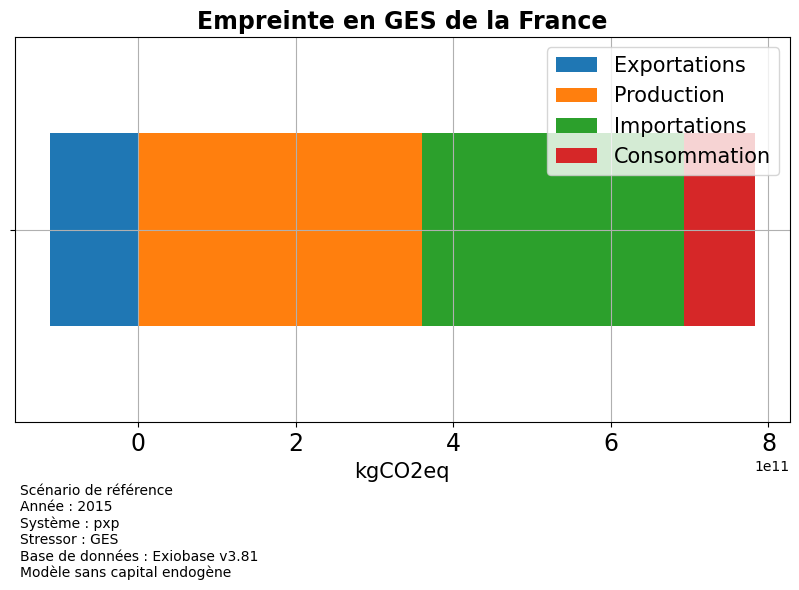

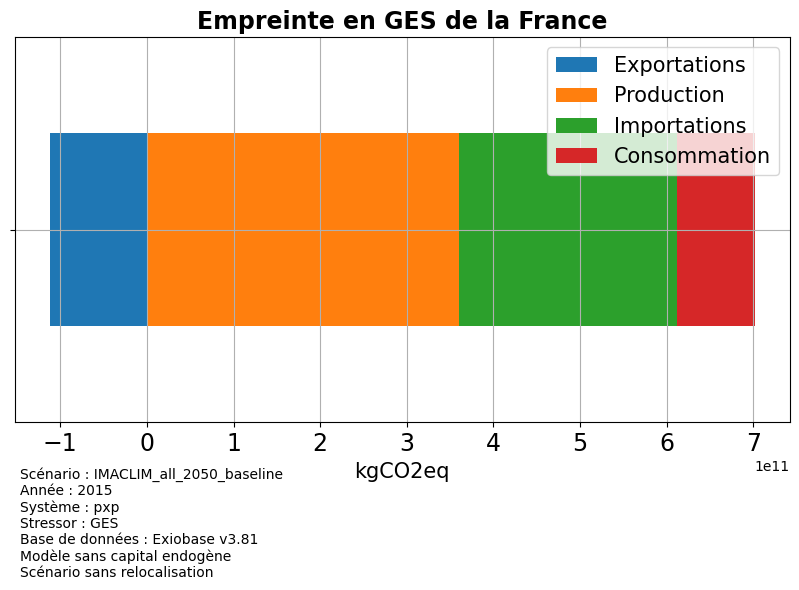

In [14]:
model.plot_footprint_FR()
model.plot_footprint_FR(counterfactual_name="IMACLIM_all_2050_baseline")

La méthode `plot_stressor_content_heatmap` permet d'avoir une vision globale de l'intensité en stressors des différents secteurs dans chaque région.

In [ ]:
model.plot_stressor_content_heatmap()

La méthode `plot_stressor_content_production` permet de comparer les intensités en stressors de la production de chaque région pour chaque secteur.

In [ ]:
model.plot_stressor_content_production()

Pour les deux méthodes précédentes, il est possible de saisir le nom d'un scénario en argument pour tracer la figure associée (sans argument, la figure se réfère à la référence).

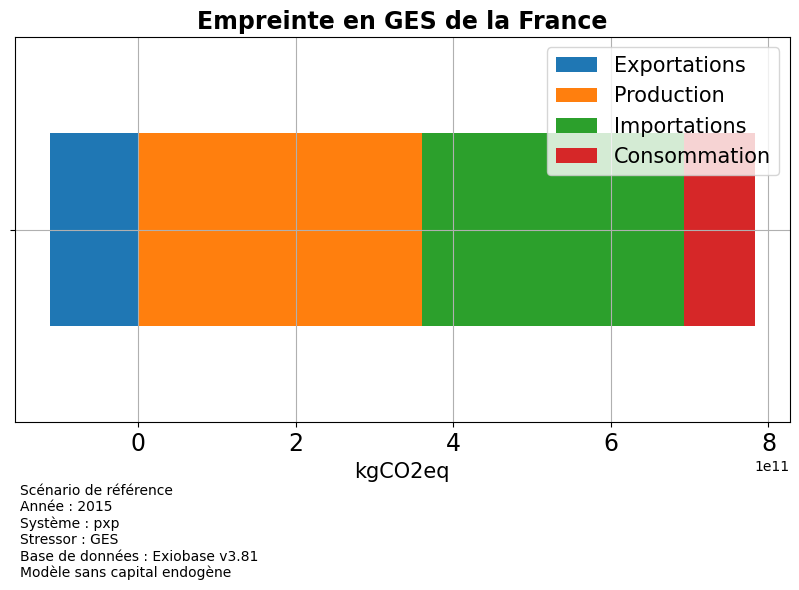

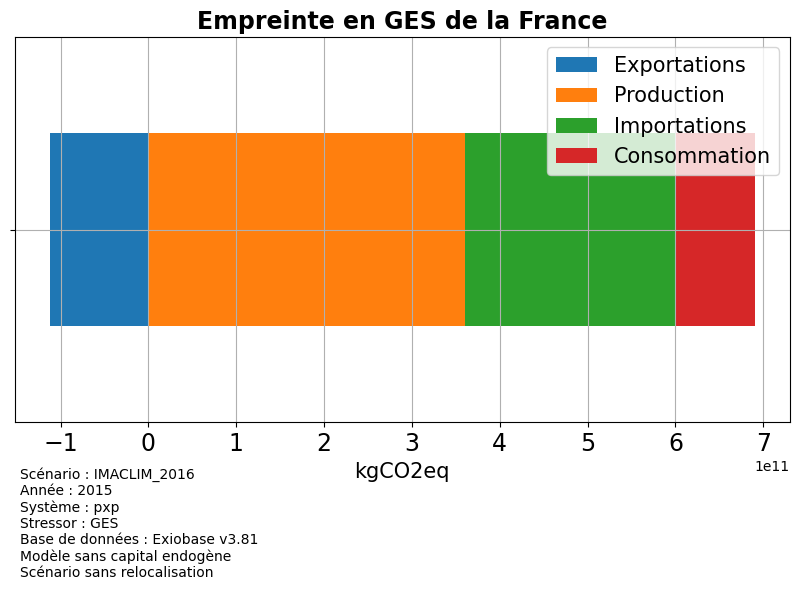

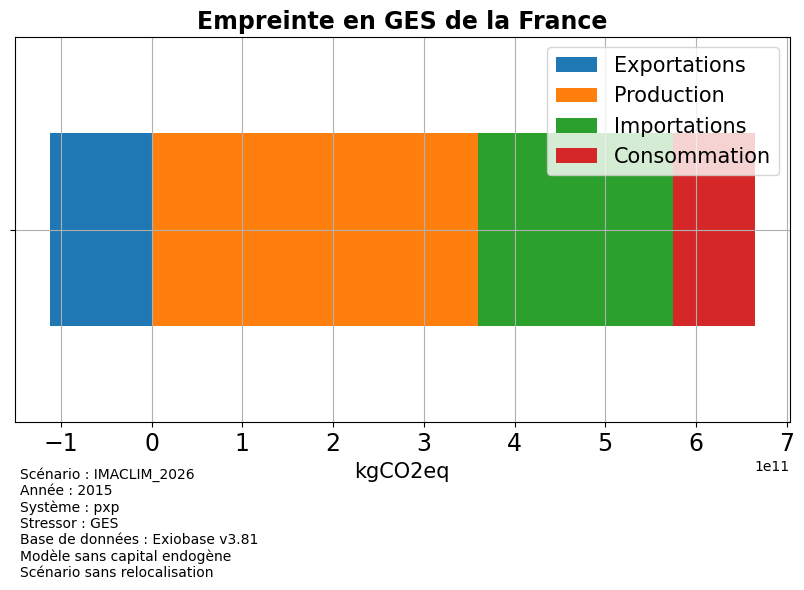

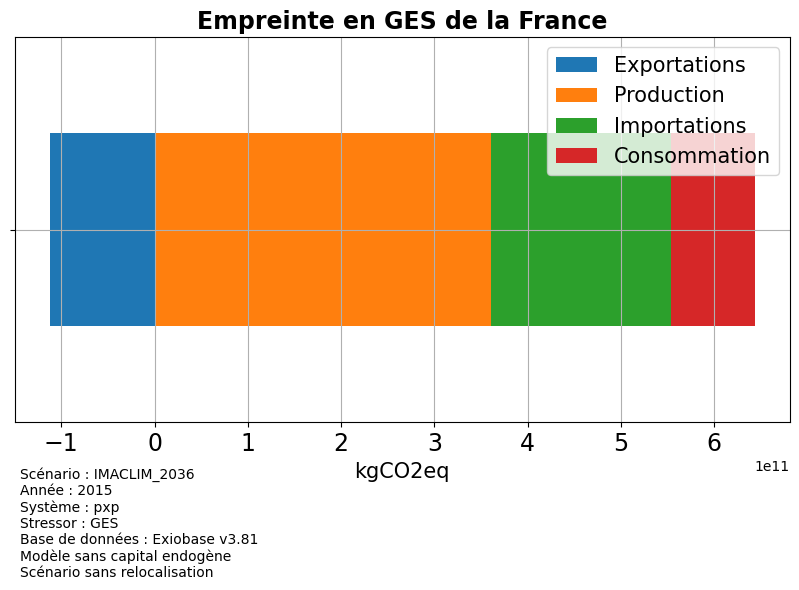

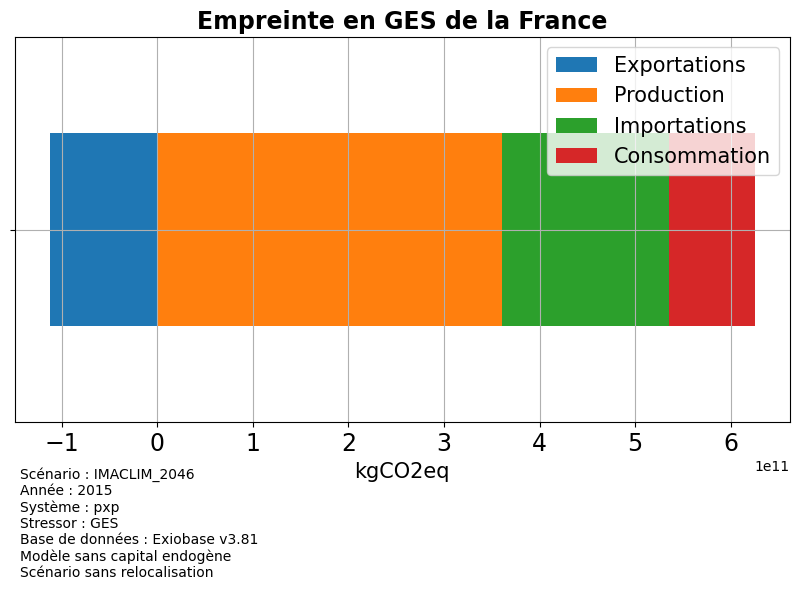

In [18]:
model.plot_footprint_FR()
for year in range(2016,2050,10):
    model.plot_footprint_FR(counterfactual_name="IMACLIM_"+str(year))
    # model.plot_footprint_FR(counterfactual_name="IMACLIM_tech"+str(year))

In [417]:
from src.utils import footprint_extractor
for year in range(2016,2050,10):
    # model.plot_footprint_FR(counterfactual_name="IMACLIM_"+str(year))
    print(footprint_extractor(model.counterfactuals["IMACLIM_tech"+str(year)],"FR"))

{'Exportations': -111957444792.27826, 'Production': 360223664871.74036, 'Importations': 332267026103.447, 'Consommation': 89874365398.01366}
{'Exportations': -111957671327.86143, 'Production': 360224024278.4208, 'Importations': 330314337764.613, 'Consommation': 89874365398.01366}
{'Exportations': -111666788175.92715, 'Production': 359928749190.0962, 'Importations': 324736401851.0638, 'Consommation': 89874365398.01366}
{'Exportations': -111495958188.58665, 'Production': 359755443489.07733, 'Importations': 319410304382.271, 'Consommation': 89874365398.01366}


In [16]:
from src.utils import footprint_extractor
print(footprint_extractor(model.counterfactuals["IMACLIM_all_2050_baseline"],"FR"))

{'Exportations': -111667916532.48842, 'Production': 359929902334.1214, 'Importations': 251588373111.85562, 'Consommation': 89874365398.01366}


Les méthodes `plot_trade_synthesis`, `plot_stressor_synthesis` et `plot_substressor_synthesis` tracent chacune plusieurs graphiques permettant d'avoir une vision globale des différences entre un scénario donné et la référence concernant respectivement le commerce, le niveau global de stressors, ou bien les composantes des stressors prises séparément.

In [ ]:
model.plot_trade_synthesis("best")

In [ ]:
model.plot_substressor_synthesis("best")

In [ ]:
model.plot_substressor_synthesis("best")

In [ ]:
model.plot_substressor_synthesis("best_n")

In [ ]:
model.plot_substressor_synthesis("best")

Pour appeler une méthode sur l'ensemble des scénarios chargés dans l'objet `Model`, il suffit de suffixer la méthode par `_all`.

Toutes les figures créées sont à la fois affichées et enregistrées dans le dossier `figures`.

## 5. Améliorer la lisibilité des figures

Pour améliorer la lisibilité des figures, il est possible d'agréger les régions entre elles et/ou les secteurs entre eux. Pour cela, il suffit de renseigner les attributs `regions_mapper` et/ou `sectors_mapper` dans l'objet `Model`. Il est attendu des dictionnaires d'appariement similaires aux exemples `REGIONS_AGG` et `SECTORS_AGG` fournis dans le fichier `src/settings.py`. Pour retirer cette agrégation, il suffit d'affecter la valeur `None` aux attributs `regions_mapper` et/ou `sectors_mapper`.

_Remarque :_ plusieurs attributs de l'objet `Model` sont automatiquement modifié lorsque `regions_mapper` ou `sectors_mapper` sont modifiés par l'utilisateur, l'utilisateur n'a pas à s'en occuper.

**Attention :** ces nouvelles figures écraseront les éventuelles figures créées précédemment avec les mêmes paramètres mais une aggrégation différente (point à améliorer éventuellement par la suite).

In [ ]:
model.plot_stressor_content_production("pref_eu")

In [ ]:
from main import REGIONS_AGG

model.regions_mapper = REGIONS_AGG
model.plot_stressor_content_production("pref_eu")

In [ ]:
from main import SECTORS_AGG

model.sectors_mapper = SECTORS_AGG
model.plot_stressor_content_production("pref_eu")

In [ ]:
model.regions_mapper = None
model.plot_stressor_content_production("pref_eu")

## 6. Endogénéisation de la consommation de capital

Pour endogénéiser la consommation de capital par les différents secteurs, il suffit d'ajouter `capital=True` lors de la création d'un nouveau modèle. Le programme télécharge alors la base de données de consommation de capital et crée le modèle associé.

In [ ]:
model_cap = Model(capital=True)

In [ ]:
model_cap.iot.Z

In [ ]:
from src.utils import load_Kbar
load_Kbar(year=model_cap.base_year,
                system=model_cap.system,
                path=model_cap.capital_consumption_path,
            )

On peut alors utiliser le modèle exactement comme précédemment.

In [ ]:
model_cap.plot_footprint_FR()

La fonction `endogenous_capital_comparison` du fichier `main.py` permet de comparer les composantes de l'empreinte carbone d'une région au cours des années, avec ou sans endogénéisation du capital. Attention, si les modèles n'ont jamais été chargés, elle peut prendre du temps (compter ~10 minutes par année). Sinon, elle ne prend que quelques secondes.
À la différence des autres fonctions d'édition de figures, cette fonction renvoie un dictionnaire contenant les modèles chargés, pour les traiter plus facilement par la suite.

In [ ]:
from main import endogenous_capital_comparison

endogenous_capital_comparison(start_year=2012, end_year=2015)

## 7. Étudier d'autres stressors

Pour le moment, nous nous sommes focalisés sur les émissions de GES. Néanmoins, il est possible n'importe quel autre stressor figurant dans Exiobase 3.

Pour cela, il suffit de renseigner l'argument `stressor_params` lors de la création d'un nouvel objet `Model`. Cet argument attend un dictionnaire ayant un format bien particulier :
- `"name_FR"` : nom du type de stressor en français, pour l'affichage des graphiques (titres, légendes...)
- `"name_EN"` : nom du type de stressor en anglais, sans caractères spéciaux, sans espaces, pour les chemins d'accès
- `"unit"` : unité du stressor (telle qu'affichée sur les graphiques)
- `"proxy"` : contient un dictionnaire contenant plusieurs items correspondant à chaque composante des stressors, et associant le nom de la composante (clé) à un dictionnaire (valeur) ayant le format suivant :
    - `"exiobase_keys"` : liste des items de la matrice S d'Exiobase 3 correspondant à la clé
    - `"weight"` : une pondération éventuelle (par exemple pour travailler en CO2eq pour les GES)

À partir de ce dictionnaire, le programme va agréger les lignes désignées par les listes `"exiobase_keys"`, pour chaque item, et travailler avec les matrices `S`, `F`, `S_Y` et `F_Y` ainsi obtenues.

In [ ]:
from main import MATERIAL_PARAMS

model_materials = Model(stressor_params=MATERIAL_PARAMS)
model_materials.plot_footprint_FR()

In [ ]:
model_materials.new_counterfactual("best", DICT_SCENARIOS["best"])

In [ ]:
model_materials.plot_substressor_synthesis("best")

Pour étudier un nouveau stressor, il suffit de créer un dictionnaire similaire. Pour cela, on peut utiliser les méthodes du module `pandas` sur le MRIO brut sauvegardé au format `pickle` dans le dossier `data/exiobase`.

In [ ]:
import pickle as pkl

with open("data/exiobase/2015__pxp/2015__pxp.pickle", "rb") as f:
    mrio = pkl.load(f)

In [ ]:
mrio.satellite.S_Y.index[mrio.satellite.S_Y.index.str.contains("Gold|gold")] # this syntax means "'Gold' OR 'gold'"

In [ ]:
mrio.satellite.S_Y.index[mrio.satellite.S_Y.index.str.contains("forest|Forest")]

In [ ]:
model.iot.Z["FR"]

In [ ]:
model.counterfactuals["best"].iot.Z["FR"]

In [ ]:
import pandas as pd

In [ ]:
dataframee=pd.read_csv("../Data/AR6_Scenarios_Database_ISO3_v1.0.csv")

In [ ]:
import numpy as np

In [ ]:
#

# Building the imported scenarios and the correpondance tables
Temproary solution

In [407]:
# fix module path dependencies
import sys
from pathlib import Path


# general
import os

# scientific
import pandas as pd
import numpy as np

# local modules



# settings
components = ['Production value', 'Production prices', 'World prices', 'Direct CO2 emissions', 'Investment', \
	'Secondary Energy', 'Final Energy']
regions = ['USA', 'CAN', 'EUR', 'JAN', 'CIS', 'CHN', 'IND', 'BRA', 'MDE', 'AFR','RAS', 'RAL', 'World']
base_year = 2015
final_year = 2050

# folder name
folder = "../Data/IMACLIM"

# read data template
template = pd.read_excel(folder + '/template_data_output.xlsx')
template.drop(['Model', 'Scenario'], axis = 1, inplace = True)
template.set_index(['Region', 'Variable', 'Unit'], inplace = True)
template.insert(
	len(template.columns),
	template.columns[-1]  + 1,    # type: ignore , template.columns[-1] should be the last year of the scenario, hence an int
	np.nan  # type: ignore 
)

# read scenario name
scenario_name = pd.read_excel(folder + '/scenario_names.xlsx')
scenario_name = scenario_name.loc[~scenario_name.equivalent.isin(['-'])]

# read data
data = pd.concat(
	[
		pd.DataFrame(
			np.genfromtxt(
				(folder + ('/outputs_advance_wp6' + str(scenario_name.nb[x]) + '.tsv')),
				delimiter = '\t'
			),
			index = template.index,
			columns = template.columns
		) for x in scenario_name.index 
	],
	axis = 0,
	keys = scenario_name.equivalent,#.tolist(),
	names = ['Scenario']
)
data.drop(template.columns[-1], axis = 1, inplace = True)

# reset index
data.reset_index(inplace = True)

# drop total quantities to avoid error
data = data.loc[~data.Variable.isin(components)]

# extract energy balance
energy_balance = data.loc[data.Variable.apply(lambda x: x.split('|')[0] in components[-2:])]

# isolate needed components: variables (except energy balance)
data = data.loc[data.Variable.apply(lambda x: x.split('|')[0] in components[0:-2])]
ind_var = data.Variable.apply(lambda x: x.split('|')[0])
ind_sect = data.Variable.apply(lambda x: x.split('|')[1] if x.split('|')[0] != 'Investment' else x.split('|')[-1])
data.drop(['Variable'], axis = 1, inplace = True)
data.insert(1, 'Sector', ind_sect)
data.insert(1, 'Variable', ind_var)

# drop invest not electricity
data = data.loc[
	(
		(data.Variable == 'Investment') & (data.Sector == 'Electricity')

	) | (data.Variable != 'Investment')
]

# update value of prices of world region
data.loc[
	(data.Region == 'World') & (data.Variable == 'Production prices'),
	range(2002, 2100 + 1)
] = data.loc[
	(data.Region == 'USA') & (data.Variable == 'World prices'),
	range(2002, 2100 + 1)
].values

# drop world prices
data.drop(data.loc[data.Variable == 'World prices'].index, inplace = True)

# convert value in US$ of BY
data.loc[data.Variable == 'Production value', range(2002, 2100+1)] = \
	data.loc[data.Variable == 'Production value', range(2002, 2100+1)].mul(
		data.loc[data.Variable == 'Production prices', base_year].divide(
			data.loc[data.Variable == 'Production prices', 2005]
		).values,
		axis = 0
	)
data.loc[data.Variable == 'Production value', 'Unit'] = 'billion US$' + str(base_year)

# convert price in US$ of BY
data.loc[data.Variable == 'Production prices', range(2002, 2100+1)] = \
	data.loc[data.Variable == 'Production prices', range(2002, 2100+1)].divide(
		data.loc[data.Variable == 'Production prices', base_year],
		axis = 0
	)
data.loc[data.Variable == 'Production prices', 'Unit'] = 'index' + str(base_year)

# isolate needed components: regions
data = data.loc[data.Region.apply(lambda x: x in regions)]
data.set_index(['Variable', 'Scenario','Region','Sector', 'Unit',], inplace = True)

# isolate needed components: years
data = data[range(base_year, final_year + 1, 1)]

# drop unit
data.index = data.index.droplevel('Unit')

# build production volume varible
data = pd.concat(
	[
		data,
		pd.concat(
			{'Production volume': data.loc['Production value'].divide(data.loc['Production prices'])},
			axis = 0, 
			names = [data.index.names[0]]
		)
	],
	axis = 0
)

# build emission factors of production
data = pd.concat(
	[
		data,
		pd.concat(
			{'CO2 emission factors': data.loc['Direct CO2 emissions'].divide(data.loc['Production volume'])},
			axis = 0, 
			names = [data.index.names[0]]
		)
	],
	axis = 0
)

# data.loc['Direct CO2 emissions'].loc['2°C'][range(2015, 2055, 5)].to_csv('advance_2°C_CO2emissions.csv')
# data.loc['CO2 emission factors'].loc['2°C'][range(2015, 2055, 5)].to_csv('advance_2°C_CO2content.csv')

# breakpoint()

# build emission factors evolution
final_data = data.loc['CO2 emission factors'].divide(data.loc['CO2 emission factors'][2015], axis = 0)
final_data = final_data - 1
final_data.drop(2015, axis = 1, inplace = True)

# set carbon content evolution of primary fossil fuels at zero
# for scenario_name in final_data.index.get_level_values(0):
# 	for primary_energy in ['Coal', 'Oil', 'Gas']:
# 		for region in regions:
# 			final_data.loc[(scenario_name,region, primary_energy), :] = 0.0
   
#### NOTE ####
# liquid fuels = refined fossil fuels + biofuels
# gas / oil / coal = extractive sector ==> do not take into account EF evolution

# test calc K invest elec
kappa_elec = data.loc['Investment'].droplevel('Sector', axis = 0).divide(
	data.loc['Production volume'].xs('Elec', level = 'Sector')
)
kappa_elec = kappa_elec.divide(kappa_elec[2015], axis = 0)
kappa_elec = kappa_elec - 1
kappa_elec.drop(2015, axis = 1, inplace = True)

## kappa_elec result strange... don't remember !!! 
## il faut prendre celui de l'lectricité ! je pense qu'il y a un souci

########################
# build energy balance #
########################

# keep only the regions we are interested in
energy_balance = energy_balance.loc[energy_balance.Region.isin(regions)]
energy_balance.drop(['Unit'], axis = 1, inplace = True)

# drop totals
energy_balance = energy_balance.loc[energy_balance.Variable.apply(lambda x: len(x.split('|'))>2)]

# drop final and secondary name from variable
energy_balance.loc[:, 'Variable'] = energy_balance.Variable.apply(lambda x: '|'.join(x.split('|')[1:]))

# build sector columns
energy_balance.insert(1, column = 'Sector',
	value = energy_balance.Variable.apply(lambda x: x.split('|')[0])
)
energy_balance.insert(2, column = 'Product',
	value = energy_balance.Variable.apply(lambda x: x.split('|')[-1])
)


# keep usefull information
sector_list = {
	'Electricity': ['Coal', 'Oil', 'Gas'],#, 'Biomass'],
	'Liquids': ['Coal', 'Oil', 'Gas'],#, 'Biomass'],
	'Residential and Commercial': ['Coal', 'Liquids', 'Gases', 'Electricity'],
	'Transportation': ['Liquids', 'Electricity'],
	'Other Sector':['Coal', 'Liquids', 'Gases', 'Electricity']
}

energy_balance = pd.concat(
	[energy_balance.loc[
		energy_balance.Sector.isin([elt]) & energy_balance.Product.isin(sector_list[elt])
	] for elt in sector_list.keys()],
	axis = 0
).drop('Variable', axis = 1)

# harmonize sector and energy names
matching_list = {
	'Electricity': 'Elec',
	'Liquids': 'Liquid fuels',
	'Gases': 'Gas',
	'Transportation': 'Terrestrial transport',
	'Residential and Commercial': 'Services'
}


reverse_matching_list={matching_list[key]:key for key in matching_list.keys()}

for column in ['Sector', 'Product']:
	for (key, value) in matching_list.items():
		energy_balance.loc[energy_balance.loc[:, column].isin([key]), column] = value

# add "Other Sectors" to the "Service" industry
energy_balance.loc[energy_balance.Sector == 'Services', range(2002, 2100+1)] += \
	energy_balance.loc[energy_balance.Sector == 'Other Sector', range(2002, 2100+1)].values
energy_balance = energy_balance.loc[energy_balance.Sector != 'Other Sector']

# drop lines with nan
energy_balance = energy_balance.loc[~energy_balance[2015].isna()]

# set and sort index
energy_balance.set_index(['Scenario', 'Sector', 'Product',"Region"], inplace = True)
energy_balance = energy_balance.sort_index()

# keep useful year
energy_balance = energy_balance.loc[:, range(2015, 2050+1)]


# build technical coefficients evolution / 2015
technical_coef = energy_balance.copy()
for scenario,sector in zip(technical_coef.index.get_level_values("Scenario"),technical_coef.index.get_level_values("Sector")):
	extractor=data.loc['Production volume']
	extractor=extractor.reorder_levels(["Scenario","Sector","Region"]).sort_index()
	totals=extractor.loc[(scenario,sector)]
	technical_coef.loc[scenario,sector, :] = energy_balance.loc[scenario,sector].divide(totals, axis = 1).values

 
 
 
	
technical_coef = technical_coef.divide(technical_coef[2015], axis = 0) - 1
technical_coef.drop(2015, axis = 1, inplace = True)
technical_coef.replace(np.nan, 0.0, inplace = True)
technical_coef.replace(np.inf, 0.0, inplace = True)



# # quick check: il y a des choses étranges sur les services !
# for elt in [2030, 2050]:
# 	print(
# 		technical_coef[elt].to_frame('data').reset_index().pivot(
# 			values = 'data', index = ['Scenario', 'Product'], columns = ['Sector'])
# 	)

# final technical coef with all sectors

technical_coef=technical_coef.reorder_levels(["Scenario","Region","Sector","Product"]).sort_index()

final_technical_coef = pd.concat(
	{
		elt: pd.DataFrame(
			np.nan, index = final_data.index.get_level_values('Sector').unique(),
			columns = technical_coef.columns
		) for elt in final_data.index
	},
)
final_technical_coef.index.names = technical_coef.index.names
final_technical_coef.update(technical_coef)
final_technical_coef.replace(np.nan, 0.0, inplace = True)
final_technical_coef.sort_index(inplace=True)


In [408]:
Link=pd.DataFrame(data=0,index=np.sort(model.iot.stressor_extension.S["FR"].columns),columns=np.sort(final_data.loc["INDC"].index.get_level_values(1).unique()))
for i in Link.index:
    for j in Link.columns:
        if i==j:
            Link.loc[i,j]=1
pairing=[("Crude oil","Oil"),("Crude coal","Coal"),("Automobile","Industry"),
         ("Transport services","Maritime"),("Biomass_industry","Industry"),("Clothing","Industry"),
         ("Composite","Industry"),("Electricity and heat",'Elec'),("Electronics","Industry"),
         ("Extractive industry","Industry"),("Fossil fuels","Liquid fuels"),("Heavy_industry","Industry"),
         ("Machinery","Industry"),("Natural gas","Gas"),("Oth transport equipment","Air")]
for pair in pairing: 
    Link.loc[pair[0],pair[1]]=1

In [409]:
Link

,Agriculture,Air,Coal,Construction,Elec,Gas,Industry,Liquid fuels,Maritime,Oil,Services,Terrestrial transport
Agriculture,1,0,0,0,0,0,0,0,0,0,0,0
Automobile,0,0,0,0,0,0,1,0,0,0,0,0
Biomass_industry,0,0,0,0,0,0,1,0,0,0,0,0
Clothing,0,0,0,0,0,0,1,0,0,0,0,0
Composite,0,0,0,0,0,0,1,0,0,0,0,0
Construction,0,0,0,1,0,0,0,0,0,0,0,0
Crude coal,0,0,1,0,0,0,0,0,0,0,0,0
Crude oil,0,0,0,0,0,0,0,0,0,1,0,0
Electricity and heat,0,0,0,0,1,0,0,0,0,0,0,0
Electronics,0,0,0,0,0,0,1,0,0,0,0,0


In [410]:
Link_country=pd.DataFrame(data=0,index=np.sort(model.regions),columns=np.sort(final_data.loc["INDC"].index.get_level_values(0).unique()))
pairing=[("EU","EUR"),("Brazil, Mexico","BRA"),("FR","EUR"),
         ("China, RoW Asia and Pacific","CHN"),("United States","USA"),("Asia, Row Europe","IND"),
         ("UK, Norway, Switzerland","EUR"),("RoW Middle East, Australia","MDE"),("Japan, Indonesia, RoW Africa","AFR"),
         ("RoW America,Turkey, Taïwan","World"),("South Africa","AFR")]
for pair in pairing: 
    Link_country.loc[pair[0],pair[1]]=1

In [411]:
Link_country

,AFR,BRA,CAN,CHN,CIS,EUR,IND,JAN,MDE,RAL,RAS,USA,World
"Asia, Row Europe",0,0,0,0,0,0,1,0,0,0,0,0,0
"Brazil, Mexico",0,1,0,0,0,0,0,0,0,0,0,0,0
"China, RoW Asia and Pacific",0,0,0,1,0,0,0,0,0,0,0,0,0
EU,0,0,0,0,0,1,0,0,0,0,0,0,0
FR,0,0,0,0,0,1,0,0,0,0,0,0,0
"Japan, Indonesia, RoW Africa",1,0,0,0,0,0,0,0,0,0,0,0,0
"RoW America,Turkey, Taïwan",0,0,0,0,0,0,0,0,0,0,0,0,1
"RoW Middle East, Australia",0,0,0,0,0,0,0,0,1,0,0,0,0
South Africa,1,0,0,0,0,0,0,0,0,0,0,0,0
"UK, Norway, Switzerland",0,0,0,0,0,1,0,0,0,0,0,0,0


In [412]:
final_data_ratio=pd.concat([ Link.dot(final_data.loc[("INDC",region),:]) for region in regions],
                           axis=0,
                           keys=regions,
                           names=["regions","sector"])

/home/mpotfer/miniconda3/envs/MatMat-Trade-env/lib/python3.8/site-packages/pandas/core/indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [12]:
from src.advance import Link,Link_country


In [13]:
Link_country

,AFR,BRA,CAN,CHN,CIS,EUR,IND,JAN,MDE,RAL,RAS,USA,World
"Asia, Row Europe",0,0,0,0,0,0,1,0,0,0,0,0,0
"Brazil, Mexico",0,1,0,0,0,0,0,0,0,0,0,0,0
"China, RoW Asia and Pacific",0,0,0,1,0,0,0,0,0,0,0,0,0
EU,0,0,0,0,0,1,0,0,0,0,0,0,0
FR,0,0,0,0,0,1,0,0,0,0,0,0,0
"Japan, Indonesia, RoW Africa",1,0,0,0,0,0,0,0,0,0,0,0,0
"RoW America,Turkey, Taïwan",0,0,0,0,0,0,0,0,0,0,0,0,1
"RoW Middle East, Australia",0,0,0,0,0,0,0,0,1,0,0,0,0
South Africa,1,0,0,0,0,0,0,0,0,0,0,0,0
"UK, Norway, Switzerland",0,0,0,0,0,1,0,0,0,0,0,0,0


In [413]:

indexes=pd.Series(zip(final_technical_coef.index.get_level_values("Scenario"),final_technical_coef.index.get_level_values("Region"),final_technical_coef.index.get_level_values("Sector"))).unique()
final_technical_coef=pd.concat([Link.dot(final_technical_coef.loc[(scenario,region,sector)]) for scenario,region,sector in indexes],
                               names=("Scenario","Region","Sector","Product"),
                               keys=indexes,
                               axis=0)

final_technical_coef=final_technical_coef.swaplevel("Sector","Product").sort_index()

# making sectors match the recieving end pattern
indexes=pd.Series(zip(final_technical_coef.index.get_level_values("Scenario"),final_technical_coef.index.get_level_values("Region"),final_technical_coef.index.get_level_values("Product"))).unique()
final_technical_coef=pd.concat([Link.dot(final_technical_coef.loc[(scenario,region,product)]) for scenario,region,product in indexes],
                               names=("Scenario","Region","Product","Sector"),
                               keys=indexes,
                               axis=0)

final_technical_coef=final_technical_coef.swaplevel("Sector","Product")

#minking the region match the recieving end pattern
final_technical_coef=final_technical_coef.swaplevel("Region","Product").sort_index()

indexes=pd.Series(zip(final_technical_coef.index.get_level_values("Scenario"),final_technical_coef.index.get_level_values("Product"),final_technical_coef.index.get_level_values("Sector"))).unique()
final_technical_coef=pd.concat([Link_country.dot(final_technical_coef.loc[(scenario,product,sector)]) for scenario,product,sector in indexes],
                               names=("Scenario","Product","Sector","Region"),
                               keys=indexes,
                               axis=0)


final_technical_coef=final_technical_coef.swaplevel("Region","Product").sort_index()




In [414]:
# formating the dataframe more similarly to A

indexes=pd.Series(zip(final_technical_coef.index.get_level_values("Scenario"),final_technical_coef.index.get_level_values("Region"),final_technical_coef.index.get_level_values("Sector"))).unique()
final_technical_coef=pd.concat([final_technical_coef.loc[(scenario,product,sector)] for scenario,product,sector in indexes],
                               names=("Scenario","Region","Sector","Year"),
                               keys=indexes,
                               axis=1)


final_technical_coef=final_technical_coef.reorder_levels(("Scenario","Year","Region","Sector"),axis=1)
final_technical_coef.columns.rename(["Scenario","Year","region","sector"],inplace=True)
final_technical_coef.index.rename("sector",inplace=True)

In [421]:
final_data.loc["INDC","World"]

/tmp/ipykernel_6913/2158597204.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  final_data.loc["INDC","World"]


,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Sector,,,,,,,,,,,,,,,,,,,,,
Coal,0.005422,0.008835,0.012293,0.014678,0.018866,0.021380,0.022224,0.024137,0.025001,0.025414,...,0.004447,-0.003328,-0.009709,-0.013542,-0.015248,-0.015279,-0.015117,-0.015321,-0.015791,-0.016467
Oil,-0.002015,-0.002895,-0.004195,-0.005343,-0.006476,-0.007318,-0.008576,-0.009812,-0.010947,-0.011760,...,-0.059728,-0.062290,-0.064572,-0.067879,-0.070996,-0.073937,-0.076660,-0.078802,-0.080604,-0.081697
Gas,-0.001368,-0.003464,-0.003960,-0.004409,-0.006956,-0.009591,-0.012579,-0.015285,-0.017306,-0.020340,...,-0.039303,-0.039963,-0.041104,-0.041676,-0.041842,-0.042377,-0.042640,-0.042748,-0.044127,-0.046508
Liquid fuels,-0.006245,-0.013919,-0.020779,-0.027687,-0.034333,-0.041360,-0.047930,-0.054452,-0.060490,-0.065548,...,-0.206850,-0.217531,-0.227822,-0.237738,-0.246968,-0.256022,-0.264520,-0.254787,-0.241318,-0.209027
Elec,-0.022245,-0.040123,-0.057515,-0.073589,-0.101631,-0.127015,-0.149052,-0.170223,-0.190006,-0.208548,...,-0.445745,-0.461884,-0.477824,-0.492416,-0.506128,-0.519579,-0.532326,-0.544970,-0.557263,-0.569579
Construction,-0.005570,-0.010030,-0.013233,-0.017668,-0.021907,-0.026304,-0.031750,-0.036473,-0.041543,-0.046572,...,-0.181848,-0.191772,-0.202386,-0.212661,-0.223068,-0.233585,-0.243062,-0.252347,-0.260766,-0.267381
Services,-0.024384,-0.048065,-0.072721,-0.097710,-0.122500,-0.147749,-0.172581,-0.197633,-0.221940,-0.245776,...,-0.543728,-0.554820,-0.565468,-0.574598,-0.583321,-0.590832,-0.598037,-0.603535,-0.608796,-0.612533
Air,-0.011774,-0.023827,-0.034583,-0.044788,-0.056836,-0.066045,-0.076029,-0.085612,-0.094365,-0.102840,...,-0.253824,-0.264263,-0.275835,-0.287323,-0.299429,-0.311716,-0.323574,-0.334587,-0.344831,-0.351080
Maritime,-0.001059,-0.002629,-0.002605,-0.003546,-0.004158,-0.003982,-0.004591,-0.005131,-0.005207,-0.004977,...,-0.052794,-0.058698,-0.064862,-0.069577,-0.075438,-0.079503,-0.084678,-0.089098,-0.093143,-0.095277


In [ ]:
indexes=pd.Series(zip(final_technical_coef.index.get_level_values("Scenario"),final_technical_coef.index.get_level_values("Region"),final_technical_coef.index.get_level_values("Sector")))

In [378]:
data.loc[("Production prices","INDC",slice(None),"Coal")]

2015      2016      2017      2018  \
Variable          Scenario Region Sector                                       
Production prices INDC     USA    Coal     1.0  1.016760  1.029609  1.042458   
                           CAN    Coal     1.0  1.016931  1.029630  1.041799   
                           EUR    Coal     1.0  1.013201  1.022002  1.030803   
                           JAN    Coal     1.0  1.012520  1.020686  1.028851   
                           CIS    Coal     1.0  1.013065  1.019597  1.026130   
                           CHN    Coal     1.0  1.014501  1.022867  1.030675   
                           IND    Coal     1.0  1.018931  1.031180  1.040646   
                           BRA    Coal     1.0  1.004525  1.004022  1.006536   
                           MDE    Coal     1.0  1.103579  1.178105  1.241684   
                           AFR    Coal     1.0  1.011791  1.016283  1.023582   
                           RAS    Coal     1.0  1.014819  1.022503  1.029638   
                           RAL    Coal     1.0  1.016532  1.026282  1.034760   
                           World  Coal     1.0  1.014341  1.023166  1.032543   

                                              2019      2020      2021  \
Variable          Scenario Region Sector                                 
Production prices INDC     USA    Coal    1.054749  1.067039  1.076536   
                           CAN    Coal    1.053439  1.066667  1.076190   
                           EUR    Coal    1.040704  1.053905  1.063256   
                           JAN    Coal    1.038106  1.047360  1.056070   
                           CIS    Coal    1.033751  1.045727  1.052803   
                           CHN    Coal    1.039598  1.044618  1.055772   
                           IND    Coal    1.050111  1.064031  1.071826   
                           BRA    Coal    1.012066  1.019608  1.024133   
                           MDE    Coal    1.300211  1.354526  1.392000   
                           AFR    Coal    1.033127  1.046603  1.054464   
                           RAS    Coal    1.037870  1.051592  1.059824   
                           RAL    Coal    1.044934  1.059347  1.069097   
                           World  Coal    1.041919  1.050745  1.060121   

                                              2022      2023      2024  ...  \
Variable          Scenario Region Sector                                ...   
Production prices INDC     USA    Coal    1.081564  1.086592  1.091061  ...   
                           CAN    Coal    1.082011  1.087302  1.091534  ...   
                           EUR    Coal    1.069307  1.075358  1.080858  ...   
                           JAN    Coal    1.060969  1.065868  1.070768  ...   
                           CIS    Coal    1.057158  1.062058  1.066957  ...   
                           CHN    Coal    1.062465  1.069716  1.076408  ...   
                           IND    Coal    1.075724  1.080178  1.084633  ...   
                           BRA    Coal    1.023127  1.023127  1.023630  ...   
                           MDE    Coal    1.417684  1.439158  1.454737  ...   
                           AFR    Coal    1.061202  1.067939  1.074677  ...   
                           RAS    Coal    1.064215  1.070801  1.076290  ...   
                           RAL    Coal    1.075880  1.082662  1.089021  ...   
                           World  Coal    1.065637  1.071704  1.076669  ...   

                                              2041      2042      2043  \
Variable          Scenario Region Sector                                 
Production prices INDC     USA    Coal    1.239665  1.248045  1.259777   
                           CAN    Coal    1.200529  1.207937  1.219577   
                           EUR    Coal    1.209021  1.216172  1.227723   
                           JAN    Coal    1.199782  1.206315  1.218291   
                           CIS    Coal    1.189439  1.197605  1.211214   
                          

In [419]:
technical_coef

2016      2017  \
Scenario      Region Sector                Product                            
INDC          AFR    Elec                  Coal         -0.012027 -0.021948   
                                           Gas           0.007222  0.004326   
                                           Oil          -0.103866 -0.202577   
                     Liquid fuels          Coal          0.000000  0.000000   
                                           Oil          -0.004714 -0.007971   
...                                                           ...       ...   
INDC2030_1600 World  Services              Elec          0.003720  0.005587   
                                           Gas          -0.009000 -0.020377   
                                           Liquid fuels -0.014345 -0.033358   
                     Terrestrial transport Elec          0.005814  0.011679   
                                           Liquid fuels -0.005116 -0.011397   

                                                             2018      2019  \
Scenario      Region Sector                Product                            
INDC          AFR    Elec                  Coal         -0.028868 -0.033716   
                                           Gas          -0.012001 -0.036222   
                                           Oil          -0.294964 -0.380374   
                     Liquid fuels          Coal          0.000000  0.000000   
                                           Oil          -0.011945 -0.015707   
...                                                           ...       ...   
INDC2030_1600 World  Services              Elec          0.005595  0.004709   
                                           Gas          -0.033498 -0.047709   
                                           Liquid fuels -0.055317 -0.079081   
                     Terrestrial transport Elec          0.017433  0.022538   
                                           Liquid fuels -0.018222 -0.025018   

                                                             2020      2021  \
Scenario      Region Sector                Product                            
INDC          AFR    Elec                  Coal         -0.038319 -0.043873   
                                           Gas          -0.064436 -0.094907   
                                           Oil          -0.456532 -0.521670   
                     Liquid fuels          Coal          0.000000  0.000000   
                                           Oil          -0.019569 -0.023398   
...                                                           ...       ...   
INDC2030_1600 World  Services              Elec          0.004229  0.003745   
                                           Gas          -0.061647 -0.074886   
                                           Liquid fuels -0.103579 -0.127447   
                     Terrestrial transport Elec          0.028060  0.031049   
                                           Liquid fuels -0.030804 -0.035828   

                                                             2022      2023  \
Scenario      Region Sector                Product                            
INDC          AFR    Elec                  Coal         -0.050453 -0.059954   
                                           Gas          -0.120541 -0.143508   
                                           Oil          -0.581755 -0.638078   
                     Liquid fuels          Coal          0.000000  0.000000   
                                           Oil          -0.027099 -0.030699   
...                                                           ...       ...   
INDC2030_1600 World  Services              Elec          0.000895 -0.002373   
                                           Gas          -0.090385 -0.106449   
                                           Liquid fuels -0.153108 -0.179196   
                     Terrestrial transport Elec          0.035177  0.039152   
                             

In [425]:
technical_coef.loc["INDC","BRA"]

2016      2017      2018      2019  \
Sector                Product                                                
Elec                  Coal          0.004688  0.171220  0.476468  0.818071   
                      Gas           0.007054 -0.003303 -0.023493 -0.053780   
                      Oil          -0.075718 -0.147564 -0.215557 -0.281843   
Liquid fuels          Coal          0.000000  0.000000  0.000000  0.000000   
                      Oil          -0.004460 -0.008715 -0.012125 -0.016184   
Services              Coal          0.000000  0.000000  0.000000  0.000000   
                      Elec          0.002642 -0.001213 -0.008745 -0.016961   
                      Gas           0.003360  0.001366 -0.004146 -0.010246   
                      Liquid fuels -0.004001 -0.015959 -0.031917 -0.048415   
Terrestrial transport Elec          0.002672  0.003574  0.005499  0.006523   
                      Liquid fuels -0.005647 -0.014371 -0.022774 -0.032279   

                                        2020      2021      2022      2023  \
Sector                Product                                                
Elec                  Coal          1.082883  1.269891  1.379391  1.480267   
                      Gas          -0.095220 -0.142266 -0.190914 -0.235287   
                      Oil          -0.346868 -0.404863 -0.464310 -0.523713   
Liquid fuels          Coal          0.000000  0.000000  0.000000  0.000000   
                      Oil          -0.020175 -0.024260 -0.028942 -0.033166   
Services              Coal          0.000000  0.000000  0.000000  0.000000   
                      Elec         -0.025945 -0.031550 -0.041451 -0.050605   
                      Gas          -0.017260 -0.020885 -0.028973 -0.036140   
                      Liquid fuels -0.065279 -0.077541 -0.094987 -0.111513   
Terrestrial transport Elec          0.007876  0.008649  0.009744  0.010190   
                      Liquid fuels -0.041564 -0.050239 -0.059396 -0.068301   

                                        2024      2025  ...      2041  \
Sector                Product                           ...             
Elec                  Coal          1.572981  1.657524  ...  3.033549   
                      Gas          -0.271192 -0.300402  ... -0.707218   
                      Oil          -0.582937 -0.641860  ... -0.983198   
Liquid fuels          Coal          0.000000  0.000000  ...  0.000000   
                      Oil          -0.036713 -0.040364  ... -0.142024   
Services              Coal          0.000000  0.000000  ...  0.000000   
                      Elec         -0.060402 -0.068817  ... -0.239695   
                      Gas          -0.043847 -0.050235  ... -0.163498   
                      Liquid fuels -0.128719 -0.144972  ... -0.392895   
Terrestrial transport Elec          0.010904  0.011791  ...  0.065890   
                      Liquid fuels -0.077209 -0.086287  ... -0.171642   

                                        2042      2043      2044      2045  \
Sector                Product                                                
Elec                  Coal          3.005347  2.972008  2.939153  2.447175   
                      Gas          -0.739527 -0.772138 -0.804579 -0.828954   
                      Oil          -0.984809 -0.986344 -0.987790 -0.989168   
Liquid fuels          Coal          0.000000  0.000000  0.000000  0.000000   
                      Oil          -0.149893 -0.157871 -0.165411 -0.172674   
Services              Coal          0.000000  0.000000  0.000000  0.000000   
                      Elec         -0.248694 -0.256485 -0.263999 -0.271225   
                      Gas          -0.166121 -0.131346 -0.068616  0.015082   
                      Liquid fuels -0.401481 -0.414266 -0.430840 -0.450105   
Terrestrial transport Elec          0.069120  0.072482  0.075562  0.079464   
                      Liquid fuels -0.174079 -0.176090 -0.178230 -0.179962   

                                        2046 

In [13]:
from src.advance import final_data_ratio

/home/mpotfer/miniconda3/envs/MatMat-Trade-env/lib/python3.8/site-packages/pandas/core/indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [14]:
final_data_ratio

2016      2017      2018  \
scenario      regions sector                                                  
INDC          USA     Agriculture             -0.029611 -0.060239 -0.092704   
                      Automobile              -0.029108 -0.057866 -0.088361   
                      Biomass_industry        -0.029108 -0.057866 -0.088361   
                      Clothing                -0.029108 -0.057866 -0.088361   
                      Composite               -0.029108 -0.057866 -0.088361   
...                                                 ...       ...       ...   
INDC2030_1600 World   Heavy_industry          -0.015212 -0.028503 -0.041355   
                      Machinery               -0.015212 -0.028503 -0.041355   
                      Natural gas             -0.001368 -0.003464 -0.003960   
                      Oth transport equipment -0.011774 -0.023827 -0.034583   
                      Transport services      -0.001059 -0.002629 -0.002605   

                                                   2019      2020      2021  \
scenario      regions sector                                                  
INDC          USA     Agriculture             -0.124632 -0.158114 -0.191090   
                      Automobile              -0.117201 -0.146895 -0.176691   
                      Biomass_industry        -0.117201 -0.146895 -0.176691   
                      Clothing                -0.117201 -0.146895 -0.176691   
                      Composite               -0.117201 -0.146895 -0.176691   
...                                                 ...       ...       ...   
INDC2030_1600 World   Heavy_industry          -0.055276 -0.070883 -0.086101   
                      Machinery               -0.055276 -0.070883 -0.086101   
                      Natural gas             -0.004409 -0.006419 -0.009854   
                      Oth transport equipment -0.044788 -0.056071 -0.066153   
                      Transport services      -0.003546 -0.003872 -0.003982   

                                                   2022      2023      2024  \
scenario      regions sector                                                  
INDC          USA     Agriculture             -0.226846 -0.261266 -0.296097   
                      Automobile              -0.206879 -0.236382 -0.265438   
                      Biomass_industry        -0.206879 -0.236382 -0.265438   
                      Clothing                -0.206879 -0.236382 -0.265438   
                      Composite               -0.206879 -0.236382 -0.265438   
...                                                 ...       ...       ...   
INDC2030_1600 World   Heavy_industry          -0.101359 -0.117428 -0.133520   
                      Machinery               -0.101359 -0.117428 -0.133520   
                      Natural gas             -0.012297 -0.015109 -0.017821   
                      Oth transport equipment -0.076113 -0.085601 -0.094409   
                      Transport services      -0.005097 -0.005306 -0.004826   

                                                   2025  ...      2041  \
scenario      regions sector                             ...             
INDC          USA     Agriculture             -0.329621  ... -0.639190   
                      Automobile              -0.294857  ... -0.658576   
                      Biomass_industry        -0.294857  ... -0.658576   
                      Clothing                -0.294857  ... -0.658576   
                      Composite               -0.294857  ... -0.658576   
...                                                 ...  ...       ...   
INDC2030_1600 World   Heavy_industry          -0.150743  ... -0.580277   
                      Machinery               -0.150743  ... -0.580277   
                      Natural gas             -0.019580  ... -0.030816   
                      Oth transport equipment -0.102134  ... -0.292684   
                      Transport services      -0.004578  ... -0.096794   

    

In [57]:
Linksector_for_regions_scenarios

Scenario                       INDC                                          \
Regions                         USA                                           
Sector                  Agriculture Air Coal Construction Elec Gas Industry   
Agriculture                       1   0    0            0    0   0        0   
Automobile                        0   0    0            0    0   0        1   
Biomass_industry                  0   0    0            0    0   0        1   
Clothing                          0   0    0            0    0   0        1   
Composite                         0   0    0            0    0   0        1   
Construction                      0   0    0            1    0   0        0   
Crude coal                        0   0    1            0    0   0        0   
Crude oil                         0   0    0            0    0   0        0   
Electricity and heat              0   0    0            0    1   0        0   
Electronics                       0   0    0            0    0   0        1   
Extractive industry               0   0    0            0    0   0        1   
Fossil fuels                      0   0    0            0    0   0        0   
Heavy_industry                    0   0    0            0    0   0        1   
Machinery                         0   0    0            0    0   0        1   
Natural gas                       0   0    0            0    0   1        0   
Oth transport equipment           0   1    0            0    0   0        0   
Transport services                0   0    0            0    0   0        0   

Scenario                                           ... INDC2030_1600  \
Regions                                            ...         World   
Sector                  Liquid fuels Maritime Oil  ...          Coal   
Agriculture                        0        0   0  ...             0   
Automobile                         0        0   0  ...             0   
Biomass_industry                   0        0   0  ...             0   
Clothing                           0        0   0  ...             0   
Composite                          0        0   0  ...             0   
Construction                       0        0   0  ...             0   
Crude coal                         0        0   0  ...             1   
Crude oil                          0        0   1  ...             0   
Electricity and heat               0        0   0  ...             0   
Electronics                        0        0   0  ...             0   
Extractive industry                0        0   0  ...             0   
Fossil fuels                       1        0   0  ...             0   
Heavy_industry                     0        0   0  ...             0   
Machinery                          0        0   0  ...             0   
Natural gas                        0        0   0  ...             0   
Oth transport equipment            0        0   0  ...             0   
Transport services                 0        1   0  ...             0   

Scenario                                                                      \
Regions                                                                        
Sector                  Construction Elec Gas Industry Liquid fuels Maritime   
Agriculture                        0    0   0        0            0        0   
Automobile                         0    0   0        1            0        0   
Biomass_industry                   0    0   0        1            0        0   
Clothing                           0    0   0        1            0        0   
Composite                          0    0   0        1            0        0   
Construction                       1    0   0        0            0        0   
Crude coal                         0    0   0        0            0        0   
Crude oil                          0    0   0        0            0        0   
Electricity and heat               0    1   0        0            0        0   
Electronics       

In [46]:
final_data

2016      2017      2018  \
Scenario      Region Sector                                                
INDC          USA    Coal                   0.000137  0.000396 -0.000015   
                     Oil                   -0.000507  0.000002 -0.000113   
                     Gas                    0.000153  0.000415  0.000019   
                     Liquid fuels          -0.007905 -0.015201 -0.022242   
                     Elec                  -0.049795 -0.090254 -0.124152   
...                                              ...       ...       ...   
INDC2030_1600 World  Air                   -0.011774 -0.023827 -0.034583   
                     Maritime              -0.001059 -0.002629 -0.002605   
                     Terrestrial transport -0.010799 -0.020436 -0.029691   
                     Agriculture           -0.028830 -0.058147 -0.087138   
                     Industry              -0.015212 -0.028503 -0.041355   

                                                2019      2020      2021  \
Scenario      Region Sector                                                
INDC          USA    Coal                   0.000392  0.000178  0.000388   
                     Oil                   -0.000255 -0.000168 -0.000193   
                     Gas                    0.000008  0.000128  0.000401   
                     Liquid fuels          -0.029705 -0.036352 -0.044155   
                     Elec                  -0.154610 -0.185410 -0.213301   
...                                              ...       ...       ...   
INDC2030_1600 World  Air                   -0.044788 -0.056071 -0.066153   
                     Maritime              -0.003546 -0.003872 -0.003982   
                     Terrestrial transport -0.038886 -0.046954 -0.055867   
                     Agriculture           -0.116110 -0.145274 -0.174162   
                     Industry              -0.055276 -0.070883 -0.086101   

                                                2022      2023      2024  \
Scenario      Region Sector                                                
INDC          USA    Coal                   0.000537  0.000424  0.000493   
                     Oil                    0.000449 -0.000220  0.000037   
                     Gas                   -0.000015  0.000305  0.000269   
                     Liquid fuels          -0.051381 -0.058651 -0.065349   
                     Elec                  -0.238976 -0.265000 -0.290214   
...                                              ...       ...       ...   
INDC2030_1600 World  Air                   -0.076113 -0.085601 -0.094409   
                     Maritime              -0.005097 -0.005306 -0.004826   
                     Terrestrial transport -0.064474 -0.071973 -0.080055   
                     Agriculture           -0.203504 -0.232046 -0.260653   
                     Industry              -0.101359 -0.117428 -0.133520   

                                                2025  ...      2041      2042  \
Scenario      Region Sector                           ...                       
INDC          USA    Coal                  -0.000105  ...  0.000317  0.000032   
                     Oil                   -0.000092  ... -0.000211  0.000068   
                     Gas                    0.000268  ...  0.000303 -0.000055   
                     Liquid fuels          -0.071716  ... -0.238548 -0.251244   
                     Elec                  -0.314621  ... -0.730142 -0.752959   
...                                              ...  ...       ...       ...   
INDC2030_1600 World  Air                   -0.102134  ... -0.292684 -0.308760   
                     Maritime              -0.004578  ... -0.096794 -0.107649   
                     Terrestrial transport -0.088078  ... -0.296487 -0.314492   
                     Agriculture           -0.288922  ... -0.649840 -0.667264   
                     Industry              -0.150743  ... -0.580277 -0.608036   

                           

In [36]:
final_technical_coef["INDC",2016,"FR"]

/home/mpotfer/miniconda3/envs/MatMat-Trade-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2885: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


sector,Agriculture,Automobile,Biomass_industry,Clothing,Composite,Construction,Crude coal,Crude oil,Electricity and heat,Electronics,Extractive industry,Fossil fuels,Heavy_industry,Machinery,Natural gas,Oth transport equipment,Transport services
sector,,,,,,,,,,,,,,,,,
Agriculture,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Automobile,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Biomass_industry,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Clothing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Composite,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Construction,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Crude coal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Crude oil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Electricity and heat,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [201]:
final_technical_coef.index==iot.A.loc["EU","FR"].sort_index().index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [29]:
final_data.to_excel("emissivity_changes.xlsx")

In [32]:
from src.advance import final_technical_coef

In [19]:
Y_bis=model.iot.Y.copy()
for region in model.regions:
    Y_bis.loc[region,region]=0
Y_bis

region                                                               FR  \
category                    Final consumption expenditure by households   
region sector                                                             
FR     Agriculture                                             0.000000   
       Crude coal                                              0.000000   
       Crude oil                                               0.000000   
       Natural gas                                             0.000000   
       Extractive industry                                     0.000000   
...                                                                 ...   
EU     Electronics                                          2582.035121   
       Fossil fuels                                         2859.174168   
       Electricity and heat                                    0.134793   
       Transport services                                   5406.378970   
       Composite                                           11783.200706   

region                                                                                                            \
category                    Final consumption expenditure by non-profit organisations serving households (NPISH)   
region sector                                                                                                      
FR     Agriculture                                                    0.000000                                     
       Crude coal                                                     0.000000                                     
       Crude oil                                                      0.000000                                     
       Natural gas                                                    0.000000                                     
       Extractive industry                                            0.000000                                     
...                                                                        ...                                     
EU     Electronics                                                    0.000000                                     
       Fossil fuels                                                   0.000000                                     
       Electricity and heat                                           0.000000                                     
       Transport services                                             0.000000                                     
       Composite                                                    404.224047                                     

region                                                                   \
category                    Final consumption expenditure by government   
region sector                                                             
FR     Agriculture                                             0.000000   
       Crude coal                                              0.000000   
       Crude oil                                               0.000000   
       Natural gas                                             0.000000   
       Extractive industry                                     0.000000   
...                                                                 ...   
EU     Electronics                                             0.000000   
       Fossil fuels                                            1.056205   
       Electricity and heat                                    0.000000   
       Transport services                                    812.700843   
       Composite                                            1278.394567   

region                                                     \
category                    Gross fixed capital formation   
region sector                                               
FR     Agriculture                           0.000000e+00   
       Crude coal            

In [20]:
model.iot.L.dot(Y_bis)

region                                                               FR  \
category                    Final consumption expenditure by households   
region sector                                                             
FR     Agriculture                                           182.011070   
       Crude coal                                              0.421515   
       Crude oil                                               1.888541   
       Natural gas                                            30.795406   
       Extractive industry                                    16.832960   
...                                                                 ...   
EU     Electronics                                          3801.800169   
       Fossil fuels                                         4377.417865   
       Electricity and heat                                 2786.364721   
       Transport services                                  10622.281791   
       Composite                                           50710.481124   

region                                                                                                            \
category                    Final consumption expenditure by non-profit organisations serving households (NPISH)   
region sector                                                                                                      
FR     Agriculture                                                    0.420725                                     
       Crude coal                                                     0.001565                                     
       Crude oil                                                      0.005701                                     
       Natural gas                                                    0.104069                                     
       Extractive industry                                            0.050924                                     
...                                                                        ...                                     
EU     Electronics                                                    3.711939                                     
       Fossil fuels                                                   3.768013                                     
       Electricity and heat                                           8.195273                                     
       Transport services                                            16.313904                                     
       Composite                                                    596.814040                                     

region                                                                   \
category                    Final consumption expenditure by government   
region sector                                                             
FR     Agriculture                                             3.904128   
       Crude coal                                              0.032532   
       Crude oil                                               0.106474   
       Natural gas                                             2.151636   
       Extractive industry                                     1.770961   
...                                                                 ...   
EU     Electronics                                            48.354913   
       Fossil fuels                                          110.198785   
       Electricity and heat                                  185.278797   
       Transport services                                   1168.258271   
       Composite                                            3745.476234   

region                                                     \
category                    Gross fixed capital formation   
region sector                                               
FR     Agriculture                              18.340147   
       Crude coal            

In [23]:
Y_ter=Y_bis.copy()
for region in model.regions:
    for region2 in model.regions:
        if region!="FR" and region2!="FR":
            Y_ter.loc[region,region2]=0
Y_ter

region                                                               FR  \
category                    Final consumption expenditure by households   
region sector                                                             
FR     Agriculture                                             0.000000   
       Crude coal                                              0.000000   
       Crude oil                                               0.000000   
       Natural gas                                             0.000000   
       Extractive industry                                     0.000000   
...                                                                 ...   
EU     Electronics                                          2582.035121   
       Fossil fuels                                         2859.174168   
       Electricity and heat                                    0.134793   
       Transport services                                   5406.378970   
       Composite                                           11783.200706   

region                                                                                                            \
category                    Final consumption expenditure by non-profit organisations serving households (NPISH)   
region sector                                                                                                      
FR     Agriculture                                                    0.000000                                     
       Crude coal                                                     0.000000                                     
       Crude oil                                                      0.000000                                     
       Natural gas                                                    0.000000                                     
       Extractive industry                                            0.000000                                     
...                                                                        ...                                     
EU     Electronics                                                    0.000000                                     
       Fossil fuels                                                   0.000000                                     
       Electricity and heat                                           0.000000                                     
       Transport services                                             0.000000                                     
       Composite                                                    404.224047                                     

region                                                                   \
category                    Final consumption expenditure by government   
region sector                                                             
FR     Agriculture                                             0.000000   
       Crude coal                                              0.000000   
       Crude oil                                               0.000000   
       Natural gas                                             0.000000   
       Extractive industry                                     0.000000   
...                                                                 ...   
EU     Electronics                                             0.000000   
       Fossil fuels                                            1.056205   
       Electricity and heat                                    0.000000   
       Transport services                                    812.700843   
       Composite                                            1278.394567   

region                                                     \
category                    Gross fixed capital formation   
region sector                                               
FR     Agriculture                           0.000000e+00   
       Crude coal            

In [26]:
model.iot.stressor_extension.S.dot(model.iot.L.dot(Y_ter))

region                                            FR  \
category Final consumption expenditure by households   
CO2                                     7.696996e+10   
CH4                                     2.939263e+10   
N2O                                     9.156832e+09   
SF6                                     5.699230e+08   
HFC                                     2.569379e+09   
PFC                                     4.673981e+08   

region                                                                                         \
category Final consumption expenditure by non-profit organisations serving households (NPISH)   
CO2                                            5.012310e+08                                     
CH4                                            1.588476e+08                                     
N2O                                            2.240874e+07                                     
SF6                                            2.706737e+06                                     
HFC                                            1.597693e+07                                     
PFC                                            1.541392e+06                                     

region                                                \
category Final consumption expenditure by government   
CO2                                     7.006046e+09   
CH4                                     1.268970e+09   
N2O                                     1.839107e+08   
SF6                                     5.657879e+07   
HFC                                     2.602608e+08   
PFC                                     6.267863e+07   

region                                                         \
category Gross fixed capital formation Changes in inventories   
CO2                       2.259045e+10           1.863269e+09   
CH4                       4.471671e+09           8.591025e+08   
N2O                       6.830019e+08           2.741690e+08   
SF6                       1.408897e+08           1.425409e+07   
HFC                       7.514164e+08           7.165665e+07   
PFC                       1.286590e+08           1.128084e+07   

region                                              \
category Changes in valuables Exports: Total (fob)   
CO2                       0.0                  0.0   
CH4                       0.0                  0.0   
N2O                       0.0                  0.0   
SF6                       0.0                  0.0   
HFC                       0.0                  0.0   
PFC                       0.0                  0.0   

region                       UK, Norway, Switzerland  \
category Final consumption expenditure by households   
CO2                                     5.100540e+09   
CH4                                     2.395652e+09   
N2O                                     9.762625e+08   
SF6                                     2.288745e+07   
HFC                                     3.696394e+08   
PFC                                     1.841156e+07   

region                                                                                         \
category Final consumption expenditure by non-profit organisations serving households (NPISH)   
CO2                                            1.903730e+07                                     
CH4                                            5.474932e+06                                     
N2O                                            7.864010e+05                                     
SF6                                            8.807093e+04                                     
HFC                                            1.263939e+06                                     
PFC                                            6.440993e+04                                     

region                                                ...  \
category Final consumption expenditure by government  ...   
CO2                    

In [27]:
model.iot.stressor_extension.S.dot(model.iot.L.dot(Y_bis))

region                                            FR  \
category Final consumption expenditure by households   
CO2                                     7.696996e+10   
CH4                                     2.939263e+10   
N2O                                     9.156832e+09   
SF6                                     5.699230e+08   
HFC                                     2.569379e+09   
PFC                                     4.673981e+08   

region                                                                                         \
category Final consumption expenditure by non-profit organisations serving households (NPISH)   
CO2                                            5.012310e+08                                     
CH4                                            1.588476e+08                                     
N2O                                            2.240874e+07                                     
SF6                                            2.706737e+06                                     
HFC                                            1.597693e+07                                     
PFC                                            1.541392e+06                                     

region                                                \
category Final consumption expenditure by government   
CO2                                     7.006046e+09   
CH4                                     1.268970e+09   
N2O                                     1.839107e+08   
SF6                                     5.657879e+07   
HFC                                     2.602608e+08   
PFC                                     6.267863e+07   

region                                                         \
category Gross fixed capital formation Changes in inventories   
CO2                       2.259045e+10           1.863269e+09   
CH4                       4.471671e+09           8.591025e+08   
N2O                       6.830019e+08           2.741690e+08   
SF6                       1.408897e+08           1.425409e+07   
HFC                       7.514164e+08           7.165665e+07   
PFC                       1.286590e+08           1.128084e+07   

region                                              \
category Changes in valuables Exports: Total (fob)   
CO2                       0.0                  0.0   
CH4                       0.0                  0.0   
N2O                       0.0                  0.0   
SF6                       0.0                  0.0   
HFC                       0.0                  0.0   
PFC                       0.0                  0.0   

region                       UK, Norway, Switzerland  \
category Final consumption expenditure by households   
CO2                                     1.617267e+11   
CH4                                     6.035813e+10   
N2O                                     1.776329e+10   
SF6                                     1.003198e+09   
HFC                                     5.324837e+09   
PFC                                     8.048238e+08   

region                                                                                         \
category Final consumption expenditure by non-profit organisations serving households (NPISH)   
CO2                                            2.744532e+09                                     
CH4                                            8.251699e+08                                     
N2O                                            1.264019e+08                                     
SF6                                            1.104293e+07                                     
HFC                                            7.239909e+07                                     
PFC                                            6.697627e+06                                     

region                                                ...  \
category Final consumption expenditure by government  ...   
CO2                    

In [31]:
opti_S=pd.read_excel("/home/mpotfer/Stage/MatMat-Trade/data/aggregation/opti_S.xlsx",sheet_name="regions")

In [39]:
import numpy as np 
opti_S_new=pd.DataFrame(data=np.identity(len(opti_S["Country name"])),index=opti_S[['Country name', 'Country code']],columns=list(opti_S["Country name"]))

In [41]:
opti_S_new.to_excel("/home/mpotfer/Stage/MatMat-Trade/data/aggregation/opti_S_all_countries.xlsx")

In [5]:
import src.advance
final_data_ratio,final_technical_coef,Link_country,Link=src.advance.extract_data("IMACLIM_format")

/home/mpotfer/miniconda3/envs/MatMat-Trade-env/lib/python3.8/site-packages/pandas/core/indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [5]:
pd.read_excel("data/aggregation/IMACLIM_format.xlsx",sheet_name="sectors")

,category,sub_category,sector,Agriculture,Air,Coal,Construction,Elec,Gas,Industry,Liquid fuels,Maritime,Oil,Services,Terrestrial transport
0,NaN,Primary_Crops,Paddy rice,1,0,0,0,0,0,0,0,0,0,0,0
1,Agriculture,Primary_Crops,Wheat,1,0,0,0,0,0,0,0,0,0,0,0
2,Agriculture,Primary_Crops,Cereal grains nec,1,0,0,0,0,0,0,0,0,0,0,0
3,Agriculture,Primary_Crops,"Vegetables, fruit, nuts",1,0,0,0,0,0,0,0,0,0,0,0
4,Agriculture,Primary_Crops,Oil seeds,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,Membership organisation services n.e.c. (91),0,0,0,0,0,0,0,0,0,0,1,0
196,0,0,"Recreational, cultural and sporting services (92)",0,0,0,0,0,0,0,0,0,0,1,0
197,0,0,Other services (93),0,0,0,0,0,0,0,0,0,0,1,0
198,0,0,Private households with employed persons (95),0,0,0,0,0,0,0,0,0,0,1,0


In [16]:
Link.to_excel("/home/mpotfer/Stage/MatMat-Trade/data/IMACLIM_equivalent/opti_S_equivalent1.xlsx",sheet_name="sectors")
Link_country.to_excel("/home/mpotfer/Stage/MatMat-Trade/data/IMACLIM_equivalent/opti_S_equivalent.xlsx",sheet_name="regions")

In [17]:
import pandas as pd
Link_country==pd.read_excel("data/IMACLIM_equivalent/opti_S_equivalent.xlsx",sheet_name="regions",index_col=0)

,AFR,BRA,CAN,CHN,CIS,EUR,IND,JAN,MDE,RAL,RAS,USA,World
"Asia, Row Europe",True,True,True,True,True,True,True,True,True,True,True,True,True
"Brazil, Mexico",True,True,True,True,True,True,True,True,True,True,True,True,True
"China, RoW Asia and Pacific",True,True,True,True,True,True,True,True,True,True,True,True,True
EU,True,True,True,True,True,True,True,True,True,True,True,True,True
FR,True,True,True,True,True,True,True,True,True,True,True,True,True
"Japan, Indonesia, RoW Africa",True,True,True,True,True,True,True,True,True,True,True,True,True
"RoW America,Turkey, Taïwan",True,True,True,True,True,True,True,True,True,True,True,True,True
"RoW Middle East, Australia",True,True,True,True,True,True,True,True,True,True,True,True,True
South Africa,True,True,True,True,True,True,True,True,True,True,True,True,True
"UK, Norway, Switzerland",True,True,True,True,True,True,True,True,True,True,True,True,True


In [17]:
from src.utils import footprint_extractor
footprint_extractor(model,region="EUR")

{'Exportations': -947510730940.5728,
 'Production': 5021246893929.931,
 'Importations': 2189240661394.451,
 'Consommation': 958612517830.5798}

In [84]:
import tqdm

from src.scenarios import DICT_SCENARIOS
scenario_list=["INDC","INDC2020_1000","INDC2030_1000","INDC2020_1600","INDC2020_400","INDC2030_1600","baseline"]

for scenario in tqdm.tqdm(scenario_list[:5]):
    model.new_counterfactual("IMACLIM_all_2015_"+scenario, DICT_SCENARIOS["emissivity_IMACLIM"], year=2015,scenario=scenario)
    model.modify_counterfactual("IMACLIM_all_2015_"+scenario,DICT_SCENARIOS["technical_change_IMACLIM"], year=2015,scenario=scenario)
    
    model.new_counterfactual("IMACLIM_all_2050_"+scenario, DICT_SCENARIOS["emissivity_IMACLIM"], year=2050,scenario=scenario)
    model.modify_counterfactual("IMACLIM_all_2050_"+scenario,DICT_SCENARIOS["technical_change_IMACLIM"], year=2050,scenario=scenario)

  0%|          | 0/5 [00:00<?, ?it/s]/home/ubuntu/miniforge3/envs/MatMat-Trade-env/lib/python3.8/site-packages/pandas/core/indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/tmp/ipykernel_6408/1435273842.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  model.modify_counterfactual("IMACLIM_all_2015_"+scenario,DICT_SCENARIOS["technical_change_IMACLIM"], year=2015,scenario=scenario)
/tmp/ipykernel_6408/1435273842.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  model.modify_counterfactual("IMACLIM_all_2050_"+scenario,DICT_SCENARIOS["technical_change_IMACLIM"], year=2050,scenario=scenario)
100%|██████████| 5/5 [04:23<00:00, 52.67s/it]


In [85]:
start_year=pd.concat([ pd.concat([pd.DataFrame(footprint_extractor(model.counterfactuals["IMACLIM_all_2015_"+scenario],region=region),index=[2015]).T  for region in model.regions],
                      keys=model.regions,
                      names=("regions","types")) for scenario in tqdm.tqdm(scenario_list[:5])],
          keys=scenario_list[:5],
          names=("scenario","regions","types"))
end_year=pd.concat([ pd.concat([pd.DataFrame(footprint_extractor(model.counterfactuals["IMACLIM_all_2050_"+scenario],region=region),index=[2050]).T  for region in model.regions],
                      keys=model.regions,
                      names=("regions","types")) for scenario in tqdm.tqdm(scenario_list[:5])],
          keys=scenario_list[:5],
          names=("scenario","regions","types"))
           
pd.concat([start_year,end_year],axis=1)

100%|██████████| 5/5 [00:00<00:00, 21.49it/s]


2015          2050
scenario     regions types                                   
INDC         AFR     Exportations -5.869109e+11 -4.932946e+11
                     Production    2.412825e+12  2.035437e+12
                     Importations  3.822275e+11  2.513004e+11
                     Consommation  4.259410e+11  4.259410e+11
             BRA     Exportations -2.463252e+11 -2.059369e+11
...                                         ...           ...
INDC2020_400 USA     Consommation  1.547064e+12  1.547064e+12
             World   Exportations -0.000000e+00 -0.000000e+00
                     Production    0.000000e+00  0.000000e+00
                     Importations  0.000000e+00  0.000000e+00
                     Consommation  0.000000e+00  0.000000e+00

[260 rows x 2 columns]

In [86]:
save_before_experimentations=model.counterfactuals["IMACLIM_all_2050_INDC"].iot.copy()

In [119]:
model.counterfactuals["IMACLIM_all_2050_INDC"].iot=save_before_experimentations.copy()

In [120]:
import src.advance
final_data_ratio,final_technical_coef,Link_country,Link,demand_data=src.advance.extract_data("IMACLIM_format")

/home/ubuntu/miniforge3/envs/MatMat-Trade-env/lib/python3.8/site-packages/pandas/core/indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [121]:
demand_change=demand_data.loc[("INDC"),2050].sort_index()/demand_data.loc[("INDC"),2015].sort_index()

/tmp/ipykernel_6408/2168595532.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  demand_change=demand_data.loc[("INDC"),2050].sort_index()/demand_data.loc[("INDC"),2015].sort_index()


In [122]:
model.counterfactuals["IMACLIM_all_2050_INDC"].iot.x

indout
region sector                              
AFR    Agriculture            364832.482933
       Air                     22074.114079
       Coal                    11680.505104
       Construction           270950.188174
       Elec                    26066.126378
...                                     ...
World  Liquid fuels                0.000000
       Maritime                    0.000000
       Oil                         0.000000
       Services                    0.000000
       Terrestrial transport       0.000000

[156 rows x 1 columns]

In [123]:
model.counterfactuals["IMACLIM_all_2050_INDC"].iot.x["indout"]=model.counterfactuals["IMACLIM_all_2015_INDC"].iot.x.sort_index()["indout"]*demand_change.values

In [124]:
# Build a fictional Y matrix which would correspond to the current x

archive=model.counterfactuals["IMACLIM_all_2050_INDC"].iot.Y.copy()
Y_we_need=model.counterfactuals["IMACLIM_all_2050_INDC"].iot.x-model.counterfactuals["IMACLIM_all_2050_INDC"].iot.A.dot(model.counterfactuals["IMACLIM_all_2050_INDC"].iot.x)

In [125]:
## creates a fake detailed Y such that the row sums corresponds to the one we aim for 

coeffs=model.counterfactuals["IMACLIM_all_2050_INDC"].iot.Y.sum(axis=1)/Y_we_need["indout"].values
for row_index in model.counterfactuals["IMACLIM_all_2050_INDC"].iot.Y.index:
    model.counterfactuals["IMACLIM_all_2050_INDC"].iot.Y.loc[row_index]=float(coeffs.loc[row_index])*model.counterfactuals["IMACLIM_all_2050_INDC"].iot.Y.loc[row_index]

In [133]:
#check that we actually modified Y

~((model.counterfactuals["IMACLIM_all_2050_INDC"].iot.Y==save_before_experimentations.Y)).all().all()

True

In [134]:
model.counterfactuals["IMACLIM_all_2050_INDC"].iot.Y

region                                                               AFR  \
category                     Final consumption expenditure by households   
region sector                                                              
AFR    Agriculture                                          22983.791103   
       Air                                                   1955.249757   
       Coal                                                   -19.921265   
       Construction                                           670.086359   
       Elec                                                  6360.148695   
...                                                                  ...   
World  Liquid fuels                                                  NaN   
       Maritime                                                      NaN   
       Oil                                                           NaN   
       Services                                                      NaN   
       Terrestrial transport                                         NaN   

region                                                                                                             \
category                     Final consumption expenditure by non-profit organisations serving households (NPISH)   
region sector                                                                                                       
AFR    Agriculture                                                    66.339222                                     
       Air                                                             0.721507                                     
       Coal                                                           -0.000071                                     
       Construction                                                   46.575893                                     
       Elec                                                            0.020534                                     
...                                                                         ...                                     
World  Liquid fuels                                                         NaN                                     
       Maritime                                                             NaN                                     
       Oil                                                                  NaN                                     
       Services                                                             NaN                                     
       Terrestrial transport                                                NaN                                     

region                                                                    \
category                     Final consumption expenditure by government   
region sector                                                              
AFR    Agriculture                                            158.513680   
       Air                                                     11.179857   
       Coal                                                    -0.019365   
       Construction                                            75.759717   
       Elec                                                    12.772565   
...                                                                  ...   
World  Liquid fuels                                                  NaN   
       Maritime                                                      NaN   
       Oil                                                           NaN   
       Services                                                      NaN   
       Terrestrial transport                                         NaN   

region                                                      \
category                     Gross fixed capital formation   
region sector                                                
AFR    Agriculture                           

In [129]:
# we should now be able to compute some emissions, carefull, the consumption based don't make much sense here since we started with groos productions and made fictional Y

from src.utils import recal_stressor_per_region
model.counterfactuals["IMACLIM_all_2050_INDC"].iot.stressor_extension=recal_stressor_per_region(
        iot=model.counterfactuals["IMACLIM_all_2050_INDC"].iot,)

In [67]:
demand_data.index.rename(("scenario","region","sector"),inplace=True)
demand_data.loc[("INDC","USA"),2015].sort_index()

/home/ubuntu/miniforge3/envs/MatMat-Trade-env/lib/python3.8/site-packages/pandas/core/indexing.py:925: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


sector
Agriculture               1599.271654
Air                        272.011662
Coal                       114.533741
Construction              1772.880698
Elec                       519.346395
Gas                        115.900819
Industry                  7246.661494
Liquid fuels               709.128474
Maritime                    65.764470
Oil                        289.784787
Services                 14870.000000
Terrestrial transport      483.967836
Name: 2015, dtype: float64

In [68]:
model.counterfactuals["IMACLIM_all_2015_INDC"].iot.stressor_extension.D_pba["USA"].sum()/1e9

sector
Agriculture               497.646125
Air                       267.599070
Coal                       79.099767
Construction              122.980432
Elec                     1728.150903
Gas                       172.592264
Industry                  916.835422
Liquid fuels              197.615358
Maritime                   70.581845
Oil                       169.268671
Services                  546.145219
Terrestrial transport      61.119274
dtype: float64

In [47]:
values=[30.58,
174.7,
109.4,
0.07241,
2286,
13.61,
191.7,
220.3,
57.28,
389.1,
103.6,
864.5]

keys=['Coal', 'Oil', 'Gas', 'Liquid fuels', 'Elec', 'Construction',
       'Services', 'Air', 'Maritime', 'Terrestrial transport', 'Agriculture',
       'Industry']

direct_co2=pd.Series(values,index=pd.Index(keys,name="sector"))

In [48]:
model.counterfactuals["IMACLIM_all_2015_INDC"].iot.stressor_extension.D_pba["USA"].sum()/1e9/direct_co2.sort_index()

sector
Agriculture                 4.803534
Air                         1.214703
Coal                        2.586650
Construction                9.036035
Elec                        0.755972
Gas                         1.577626
Industry                    1.060538
Liquid fuels             2729.116943
Maritime                    1.232225
Oil                         0.968911
Services                    2.848958
Terrestrial transport       0.157079
dtype: float64

In [130]:
values= [71.03,
188,
 28.79,
 0.06345,
 301.9,
 14.52,
 129.5,
 779.8,
 112.5,
 333.9,
 71.5,
499]

direct_co2=pd.Series(values,index=pd.Index(keys,name="sector"))

In [131]:
model.counterfactuals["IMACLIM_all_2050_INDC"].iot.stressor_extension.D_pba["USA"].sum()/1e9/direct_co2.sort_index()

sector
Agriculture                -18.925932
Air                         -0.159677
Coal                        -6.495804
Construction                 0.470961
Elec                        -0.244394
Gas                        -38.705297
Industry                    -4.073262
Liquid fuels            -13583.052148
Maritime                    -3.524747
Oil                        -27.664913
Services                    -0.832135
Terrestrial transport       -0.030456
dtype: float64

In [ ]:
model.counterfactuals["IMACLIM_all_2050_INDC"].iot.x=



model.counterfactuals["IMACLIM_all_2050_INDC"].iot.stressor_extension.D_pba["USA"].sum()/1e9/direct_co2.sort_index()

In [22]:
(model.counterfactuals["IMACLIM_all_2015_INDC"].iot.stressor_extension.D_pba==model.counterfactuals["IMACLIM_all_2050_INDC"].iot.stressor_extension.D_pba).all().all()

False

NameError: name 'iot' is not defined

In [92]:
model.counterfactuals["IMACLIM_all_2050_INDC"].iot.x=

NameError: name 'demand_data' is not defined

In [96]:
model.counterfactuals["IMACLIM_all_2015_INDC"].iot.x.loc["EUR"]

,indout
sector,
Agriculture,6.271854e+05
Air,2.449527e+05
Coal,3.922050e+04
Construction,2.480571e+06
Elec,3.228301e+05
Gas,6.405015e+04
Industry,6.742607e+06
Liquid fuels,3.921806e+05
Maritime,1.819947e+05
